In [1]:
import sqlite3
db = sqlite3.connect('./database')
cursor = db.cursor()
from scipy import stats
import numpy as np

In [10]:
WGD_len = []
SSD_len = []
sing_len = []
mix_len = []
dup_len = []

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "WGD"''')
[WGD_len.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "SSD"''')
[SSD_len.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "singleton"''')
[sing_len.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "mix"''')
[mix_len.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type != "singleton"''')
[dup_len.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_len, SSD_len, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_len, sing_len, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_len, SSD_len, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_len, WGD_len, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_len, SSD_len, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_len, sing_len, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_len, sing_len, alternative='two-sided')

print('Genomic Length')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singletons:', p7.pvalue, p7.pvalue*7)

Genomic Length
WGD v SSD: 3.57780893502e-260 2.50446625451e-259
WGD v singleton: 1.52164436437e-77 1.06515105506e-76
SSD v singleton: 4.2642199549e-99 2.98495396843e-98
Mix v WGD: 2.23820572105e-05 0.000156674400474
Mix v SSD: 5.45600899394e-59 3.81920629575e-58
Mix v singleton: 2.55184458802e-09 1.78629121162e-08
Duplicates v singletons: 0.0710297991853 0.497208594297


In [11]:
WGD_ess = []
SSD_ess = []
sing_ess = []
mix_ess = []
dup_ess = []

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "WGD"''')
[WGD_ess.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "SSD"''')
[SSD_ess.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "singleton"''')
[sing_ess.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "WGD/SSD"''')
[mix_ess.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type != "singleton"''')
[dup_ess.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_ess, SSD_ess, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_ess, sing_ess, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_ess, SSD_ess, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_ess, WGD_ess, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_ess, SSD_ess, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_ess, sing_ess, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_ess, sing_ess, alternative= 'two-sided')

print('Essentiality')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singleton:', p7.pvalue, p7.pvalue*7)

Essentiality
WGD v SSD: 0.0958164937539 0.670715456277
WGD v singleton: 1.47925915881e-57 1.03548141117e-56
SSD v singleton: 2.5587091197e-62 1.79109638379e-61
Mix v WGD: 0.0874721514091 0.612305059864
Mix v SSD: 0.583441227955 4.08408859569
Mix v singleton: 8.89354459245e-27 6.22548121472e-26
Duplicates v singleton: 1.20531727311e-91 8.43722091174e-91


In [176]:
# import nbimporter
# import imp
# import Data_visualisation as v
# imp.reload(v)
# WGD_evol = []
# SSD_evol = []
# sing_evol = []


In [177]:
import math
WGD_dexp, SSD_dexp, sing_dexp, mix_dexp = [],[],[],[]

cursor.execute('''SELECT exp FROM gene_features WHERE Dev == "No" AND dup_type == "WGD" AND exp != -1''')
[WGD_dexp.append(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT dev_exp FROM gene_features WHERE Dev == "Yes" AND dup_type == "WGD" AND exp != -1''')
[WGD_dexp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE Dev == "No" AND dup_type == "SSD" AND exp != -1''')
[SSD_dexp.append(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT dev_exp FROM gene_features WHERE Dev == "Yes" AND dup_type == "SSD" AND exp != -1 AND exp != 0''')
[SSD_dexp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE Dev == "No" AND dup_type == "singleton" AND exp != -1 AND exp != 0''')
[sing_dexp.append(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT dev_exp FROM gene_features WHERE Dev == "Yes" AND dup_type == "singleton" AND exp != -1 AND exp != 0''')
[sing_dexp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE Dev == "No" AND dup_type == "WGD/SSD" AND exp != -1 AND exp != 0''')
[mix_dexp.append(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT dev_exp FROM gene_features WHERE Dev == "Yes" AND dup_type == "WGD/SSD" AND exp != -1 AND exp != 0''')
[mix_dexp.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_dexp, SSD_dexp, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_dexp, sing_dexp, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_dexp, SSD_dexp, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_dexp, WGD_dexp, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_dexp, SSD_dexp, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_dexp, sing_dexp, alternative= 'two-sided')

print('Dev expression')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)

Dev expression
WGD v SSD: 1.99709503199e-86 1.39796652239e-85
WGD v singleton: 1.06397809773e-13 7.44784668412e-13
SSD v singleton: 1.78638797871e-59 1.2504715851e-58
Mix v WGD: 0.398319905822 2.78823934076
Mix v SSD: 7.75401229499e-32 5.4278086065e-31
Mix v singleton: 5.99815577033e-06 4.19870903923e-05


In [17]:
WGD_exp, SSD_exp, sing_exp, mix_exp, dup_exp = [],[],[],[],[]
cursor.execute('''SELECT exp FROM gene_features WHERE dup_type == "WGD" AND exp != -1 AND exp != 0''')
[WGD_exp.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT exp FROM gene_features WHERE dup_type == "SSD" AND exp != -1 AND exp != 0''')
[SSD_exp.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT exp FROM gene_features WHERE dup_type == "singleton" AND exp != -1 AND exp != 0''')
[sing_exp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE dup_type == "WGD/SSD" AND exp != -1 AND exp != 0''')
[mix_exp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE dup_type != "singleton" AND exp != -1 AND exp != 0''')
[dup_exp.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_exp, SSD_exp, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_exp, sing_exp, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_exp, SSD_exp, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_exp, WGD_exp, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_exp, SSD_exp, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_exp, sing_exp, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_exp, sing_exp, alternative= 'two-sided')

print('Expression')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singleton:', p7.pvalue, p7.pvalue*7)

Expression
WGD v SSD: 2.93723361645e-60 2.05606353152e-59
WGD v singleton: 1.76286202072e-06 1.2340034145e-05
SSD v singleton: 1.54149745717e-48 1.07904822002e-47
Mix v WGD: 0.0995780581538 0.697046407077
Mix v SSD: 1.01789312692e-26 7.12525188841e-26
Mix v singleton: 4.14605334917e-05 0.000290223734442
Duplicates v singleton: 8.91959295064e-07 6.24371506545e-06


In [18]:
WGD_evol, SSD_evol, sing_evol, mix_evol, dup_evol = [],[],[],[],[]

cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type == "WGD" AND evolRate != "-"''')
[WGD_evol.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type == "SSD" AND evolRate != "-"''')
[SSD_evol.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type == "singleton" AND evolRate != "-"''')
[sing_evol.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type == "WGD/SSD" AND evolRate != "-"''')
[mix_evol.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type != "singleton" AND evolRate != "-"''')
[dup_evol.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_evol, SSD_evol, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_evol, sing_evol, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_evol, SSD_evol, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_evol, WGD_evol, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_evol, SSD_evol, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_evol, sing_evol, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_evol, sing_evol, alternative='two-sided')

print('Evolution Rate')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singletons:', p7.pvalue, p7.pvalue*7)

Evolution Rate
WGD v SSD: 7.53039907717e-112 5.27127935402e-111
WGD v singleton: 4.69144768829e-14 3.2840133818e-13
SSD v singleton: 2.99679690775e-63 2.09775783542e-62
Mix v WGD: 0.594065586014 4.1584591021
Mix v SSD: 1.52918405052e-44 1.07042883536e-43
Mix v singleton: 1.89359234872e-06 1.3255146441e-05
Duplicates v singletons: 6.55651724244e-05 0.000458956206971


In [19]:
WGD_clen, SSD_clen, sing_clen, mix_clen, dup_clen = [],[],[],[],[]

cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "WGD"''')
[WGD_clen.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "SSD"''')
[SSD_clen.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "singleton"''')
[sing_clen.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "WGD/SSD"''')
[mix_clen.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type != "singleton"''')
[dup_clen.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_clen, SSD_clen, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_clen, sing_clen, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_clen, SSD_clen, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_clen, WGD_clen, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_clen, SSD_clen, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_clen, sing_clen, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_clen, sing_clen, alternative= 'two-sided')

print('CDS by length')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singleton:', p7.pvalue, p7.pvalue*7)

CDS by length
WGD v SSD: 1.19262457021e-169 8.34837199148e-169
WGD v singleton: 1.57148251941e-111 1.10003776359e-110
SSD v singleton: 1.64913365063e-08 1.15439355544e-07
Mix v WGD: 0.03994153075 0.27959071525
Mix v SSD: 4.00861326636e-47 2.80602928645e-46
Mix v singleton: 3.37728203987e-27 2.36409742791e-26
Duplicates v singleton: 5.66547743178e-25 3.96583420225e-24


In [21]:
WGD_clen2, SSD_clen2, sing_clen2, mix_clen2, dup_clen2 = [],[],[],[],[]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type == "WGD" AND cds_exp != -1''')
[WGD_clen2.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type == "SSD" AND cds_exp != -1''')
[SSD_clen2.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type == "singleton" AND cds_exp != -1''')
[sing_clen2.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type == "WGD/SSD" AND cds_exp != -1''')
[mix_clen2.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type != "singleton" AND cds_exp != -1''')
[dup_clen2.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_clen2, SSD_clen2, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_clen2, sing_clen2, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_clen2, SSD_clen2, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_clen2,  WGD_clen2, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_clen2, SSD_clen2, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_clen2, sing_clen2, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_clen2, sing_clen2, alternative= 'two-sided')

print('CDS by expression')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singleton:', p7.pvalue, p7.pvalue*7)

CDS by expression
WGD v SSD: 3.77608844743e-121 2.6432619132e-120
WGD v singleton: 5.43126284962e-97 3.80188399473e-96
SSD v singleton: 0.007994902039 0.055964314273
Mix v WGD: 0.239844894281 1.67891425997
Mix v SSD: 6.28935191026e-37 4.40254633718e-36
Mix v singleton: 9.9392947586e-27 6.95750633102e-26
Duplicates v singleton: 6.51789237826e-31 4.56252466478e-30


In [182]:
cursor.execute('''ALTER TABLE gene_features ADD COLUMN cds_ratio REAL''')

OperationalError: duplicate column name: cds_ratio

In [ ]:
cursor.execute('''SELECT id, gLength, cds_exp FROM gene_features WHERE cds_exp != -1''')
for x in cursor.fetchall():
    ratio = int(x[2])/(x[1])
    cursor.execute('''UPDATE gene_features SET cds_ratio = ? WHERE id = ?''', (ratio, x[0]))
db.commit()

In [ ]:
rDictList = sorted(rDict, key=rDict.get) #gives a list of keys sorted by value
w_low = 0
s_low = 0
sing_low = 0
for x in rDictList[:824]:
    cursor.execute('''SELECT dup_type FROM gene_features WHERE id = ?''', (x,))
    d = cursor.fetchall()[0][0]
    if d == 'WGD':
        w_low += 1
    elif d == 'SSD':
        s_low += 1
    elif d == 'singleton':
        sing_low += 1
        
print(w_low, s_low, sing_low)
# lower = rList[:824]
# upper = rList[]

In [ ]:
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE Dev = "Yes" AND dup_type = "WGD"''')
print(cursor.fetchall()[0][0])
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE Dev = "No" AND dup_type = "WGD"''')
print(cursor.fetchall()[0][0])
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE Dev = "Yes" AND dup_type = "SSD"''')
print(cursor.fetchall()[0][0])
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE Dev = "No" AND dup_type = "SSD"''')
print(cursor.fetchall()[0][0])

In [ ]:
chi_list = [[2667,2080],
           [2790,2142]]
result = stats.chi2_contingency(chi_list)
print("P-value:",result[1])
print('Expected table:', result[3])

In [6]:
WGD_clen_con, SSD_clen_con, sing_clen_con, mix_clen_con = [],[],[],[]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE 
                gLength >= 10000 
                AND gLength <= 30000 
                AND dup_type = "WGD"
                AND exp != -1''')
[WGD_clen_con.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE 
                gLength >= 10000 
                AND gLength <= 30000 
                AND dup_type = "SSD"
                AND exp != -1''')
[SSD_clen_con.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE 
                gLength >= 10000 
                AND gLength <= 30000 
                AND dup_type = "singleton"
                AND exp != -1''')
[sing_clen_con.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE 
                gLength >= 10000 
                AND gLength <= 30000 
                AND dup_type = "WGD/SSD"
                AND exp != -1''')
[mix_clen_con.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_clen_con, SSD_clen_con, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_clen_con, sing_clen_con, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_clen_con, SSD_clen_con, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_clen_con,  WGD_clen_con, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_clen_con, SSD_clen_con, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_clen_con, sing_clen_con, alternative= 'two-sided')

print('CDS by expression- controlled for Genomic Length')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)

CDS by expression- controlled for Genomic Length
WGD v SSD: 0.000247346854029 0.0017314279782
WGD v singleton: 2.88184319736e-17 2.01729023815e-16
SSD v singleton: 7.48680434035e-07 5.24076303825e-06
Mix v WGD: 0.0598670528316 0.419069369821
Mix v SSD: 2.89779698318e-05 0.000202845788823
Mix v singleton: 6.75753532518e-12 4.73027472762e-11


In [22]:
cursor.close()
db.close()

In [16]:
# import matplotlib.pyplot as plt
# test = [1:10, 20:25]
# plt.hist(test)
# plt.show()

SyntaxError: invalid syntax (<ipython-input-16-7dd655bb0078>, line 2)

In [ ]:
#gene expression (fix- setting as median)
count = 0
pcount = 0
import re
import numpy as np
import time

cursor.execute('CREATE TABLE IF NOT EXISTS Gene_expression_data(id TEXT, name TEXT, tissue TEXT, avg_exp REAL)')
with open('Downloads/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.txt') as expression_file:
    for i in range(2):
        expression_file.readline()
    sample_ids = expression_file.readline().strip().split('\t')[2:]
    #gets where each tissue starts and ends in the sample ids
    tissue_index = {}
    old_tissue = ''
    for i in range(0,len(sample_ids)):
        #get the tissue corresponding to each id, make a dictionary of which indexes in the line belong to each tissue
        cursor.execute('''SELECT tissue FROM sample_att WHERE GTex_id == ?''', (sample_ids[i],))
        tissue = cursor.fetchall()[0][0]
        if tissue == old_tissue:
            tissue_index[tissue].append(i)
        else:
            tissue_index[tissue] = [i]
            old_tissue = tissue
    #each line is a gene
    update_count = 0
    val_list = []
    pcount = 0
    print('starting')
    t = time.time()
    for line in expression_file:
        update_count += 1
        count += 1
        av_dict = {}
        line = line.strip().split('\t')
        #gives the gene id without the version number
        gene = re.search(r'(.*)\.(.*)', line[0]).group(1)
        exp_values = line[2:]
        for i in range(0,len(exp_values)):
             exp_values[i] = float(exp_values[i])
        for tissue in tissue_index:
            mini = min(tissue_index[tissue])
            maxi = max(tissue_index[tissue]) + 1
            #get the average expression for each tissue
            av_dict[tissue] = np.median(exp_values[mini:maxi])
            val_list.append((av_dict[tissue], gene, tissue))
        if update_count == 40:
            cursor.executemany('''UPDATE Gene_expression_data SET avg_exp = ? WHERE id == ? AND tissue == ?''', val_list)
            update_count = 0
            val_list.clear()
        if count % 500 == 0:
            print(str(count) + '%', time.time() - t)
    cursor.executemany('''UPDATE Gene_expression_data SET avg_exp = ? WHERE id == ? AND tissue == ?''', val_list)

In [66]:
cursor.execute('''SELECT gene_features.id, gene_features.gLength,gene_features.cds_len, gene_features.ess, gene_features.unique_domains, gene_features.domains,gene_features.motif_number, gene_features.gc_content, gene_features.gc3, dn_ds FROM gene_features
                INNER JOIN macaque_paralogs ON 
                gene_features.id == macaque_paralogs.id
                WHERE macaque_paralogs.dn_ds 
                AND gene_features.dup_type == "WGD"
                AND macaque_paralogs.dn_ds < 10''')
#cursor.execute('''SELECT gLength, w_exp, ess, unique_domains, motif_number, gc_content, gc3 FROM gene_features''')
values_list = cursor.fetchall()
values_list = [list(x) for x in values_list]
values_list = [x[1:] for x in values_list]

In [67]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as df
values_list = pd.DataFrame(values_list).dropna()
values_list_scale = StandardScaler().fit_transform(values_list)
pca = PCA(0.99)
pca.fit_transform(values_list_scale)
for v, c in zip(pca.explained_variance, pca.components_):
    print(v, c)

0.278437650418 [ 0.40772512  0.45666837  0.06846868  0.40713376  0.43454596  0.15353356
 -0.35741239 -0.33796865 -0.01997979]
0.221653366784 [-0.06052799  0.22642811 -0.310835    0.29886738  0.29811659  0.25948601
  0.5131673   0.50561362 -0.28971411]
0.125041457948 [ 0.4928338  -0.14246269 -0.06719243 -0.25350433 -0.35423823  0.70327344
 -0.07095982  0.03420352 -0.20434414]
0.109204264591 [-0.07534482  0.19537644 -0.66228526 -0.10863835 -0.04563252  0.17151618
  0.01811088 -0.13179504  0.67566936]
0.0930737157139 [ 0.10268044  0.00821357  0.62683251  0.02930408  0.12414158  0.25518094
  0.26039301  0.26102789  0.6157459 ]
0.0606960024148 [-0.48865264 -0.42332704  0.0244541   0.55654332 -0.05977467  0.43719145
 -0.10249192 -0.25710138  0.01895406]
0.0572133061378 [-0.54310113  0.5301      0.22648199 -0.42922093  0.03492904  0.33004283
  0.0064103  -0.21117477 -0.18364715]
0.036924571943 [-0.02240968 -0.46141954 -0.10056811 -0.41645455  0.75732848  0.12887408
 -0.1096854  -0.02323495 -0

In [1]:
def mann_whitney_effect_size(list1, list2):
    import math
    from scipy import stats
    n1 = len(list1)
    n2 = len(list2)
    N = sum([n1,n2])
    U = stats.mannwhitneyu(list1, list2, alternative = 'two-sided').statistic
    mean = U-(n1*n2)
    sd = math.sqrt((n1*n2*(n1+n2+1))/12)
    return(mean/sd)

In [18]:
l1 = [1,2,3]
l2 = [1,1,3]
mann_whitney_effect_size(l1,l2)

-1.5275252316519468

In [41]:
import pandas as pd
corr = pd.read_csv('corr.csv', index_col=0)
pv = pd.read_csv('corr_pval.csv', index_col=0)

corr2 = pd.read_csv('corr_spearman.csv', index_col=0)
pv2 = pd.read_csv('corr_pval_spearman.csv', index_col=0)
pv.style.applymap(colour_pvals)

,gLength,cds_len,unique_domains,domains,motif_number_1k,gc3,max_exp,specificity,trans_count,intron_count,intron_length,avg_intron,PPIs,dn_ds
gLength,nan,0,0,0,0.0865008,0,0,0,0,0,0,0,3.79989e-06,0
cds_len,0,nan,0,0,0.0948715,0,0.0482402,1.21953e-06,0,0,0,0.000236661,2.95077e-09,0
unique_domains,0,0,nan,0,0.993245,0.00122771,0.0173906,0.00126652,0,0,0,0.161952,0,0
domains,0,0,0,nan,0.0300085,3.28286e-07,0.035583,0.437263,2.57676e-08,0,0,0.615364,9.58074e-09,0
motif_number_1k,0.0865008,0.0948715,0.993245,0.0300085,nan,0.0153796,1.33822e-05,0,0.00613797,0.145583,0.00080667,0.000276319,9.59233e-14,2.24087e-12
gc3,0,0,0.00122771,3.28286e-07,0.0153796,nan,0,0,5.85176e-12,0,0,0,9.87231e-06,0
max_exp,0,0.0482402,0.0173906,0.035583,1.33822e-05,0,nan,1.82077e-14,6.15243e-11,0.0125574,2.85105e-13,0,0,0
specificity,0,1.21953e-06,0.00126652,0.437263,0,0,1.82077e-14,nan,0,6.30607e-14,0.0131522,0.924519,0,0
trans_count,0,0,0,2.57676e-08,0.00613797,5.85176e-12,6.15243e-11,0,nan,0,0,0.353952,0,7.51772e-07
intron_count,0,0,0,0,0.145583,0,0.0125574,6.30607e-14,0,nan,0,0.376713,0,0


In [42]:
corr.style.applymap(colour_corr)

,gLength,cds_len,unique_domains,domains,motif_number_1k,gc3,max_exp,specificity,trans_count,intron_count,intron_length,avg_intron,PPIs,dn_ds
gLength,1,0.425905,0.257654,0.209551,-0.0185828,-0.34456,-0.0965469,-0.118368,0.243523,0.547151,0.684926,0.545441,0.0500795,-0.150066
cds_len,0.425905,1,0.390066,0.493832,0.0181068,-0.124016,-0.0214127,-0.0525725,0.111164,0.770971,0.306839,0.0398414,0.0642718,-0.129463
unique_domains,0.257654,0.390066,1,0.654124,9.17856e-05,-0.0350337,0.0257811,-0.0349373,0.097382,0.411101,0.194045,0.0151617,0.130364,-0.176996
domains,0.209551,0.493832,0.654124,1,-0.0235231,-0.0553203,0.0227827,-0.00842197,0.0603119,0.425331,0.184128,0.00544719,0.0621496,-0.105668
motif_number_1k,-0.0185828,0.0181068,9.17856e-05,-0.0235231,1,0.0262684,0.0471761,-0.175923,0.0297033,0.0157771,-0.0363132,-0.0394112,0.0805989,-0.0759838
gc3,-0.34456,-0.124016,-0.0350337,-0.0553203,0.0262684,1,0.0926691,0.203877,-0.0745223,-0.172921,-0.158081,-0.098742,-0.0478925,-0.211306
max_exp,-0.0965469,-0.0214127,0.0257811,0.0227827,0.0471761,0.0926691,1,0.0829295,0.0708158,0.0270569,-0.0790343,-0.0934024,0.138447,-0.113438
specificity,-0.118368,-0.0525725,-0.0349373,-0.00842197,-0.175923,0.203877,0.0829295,1,-0.158712,-0.0811957,-0.0268786,-0.00102718,-0.163796,0.176753
trans_count,0.243523,0.111164,0.097382,0.0603119,0.0297033,-0.0745223,0.0708158,-0.158712,1,0.349734,0.166654,-0.0100495,0.148124,-0.0536008
intron_count,0.547151,0.770971,0.411101,0.425331,0.0157771,-0.172921,0.0270569,-0.0811957,0.349734,1,0.389947,0.00958354,0.115502,-0.154713


In [38]:
def colour_pvals(val):
    color = 'red' if float(val) < 0.05 else 'black'
    return('color: %s' % color)

In [39]:
def colour_corr(val):
    color = 'red' if float(val) >= 0.5 else 'black'
    return('color: %s' % color)

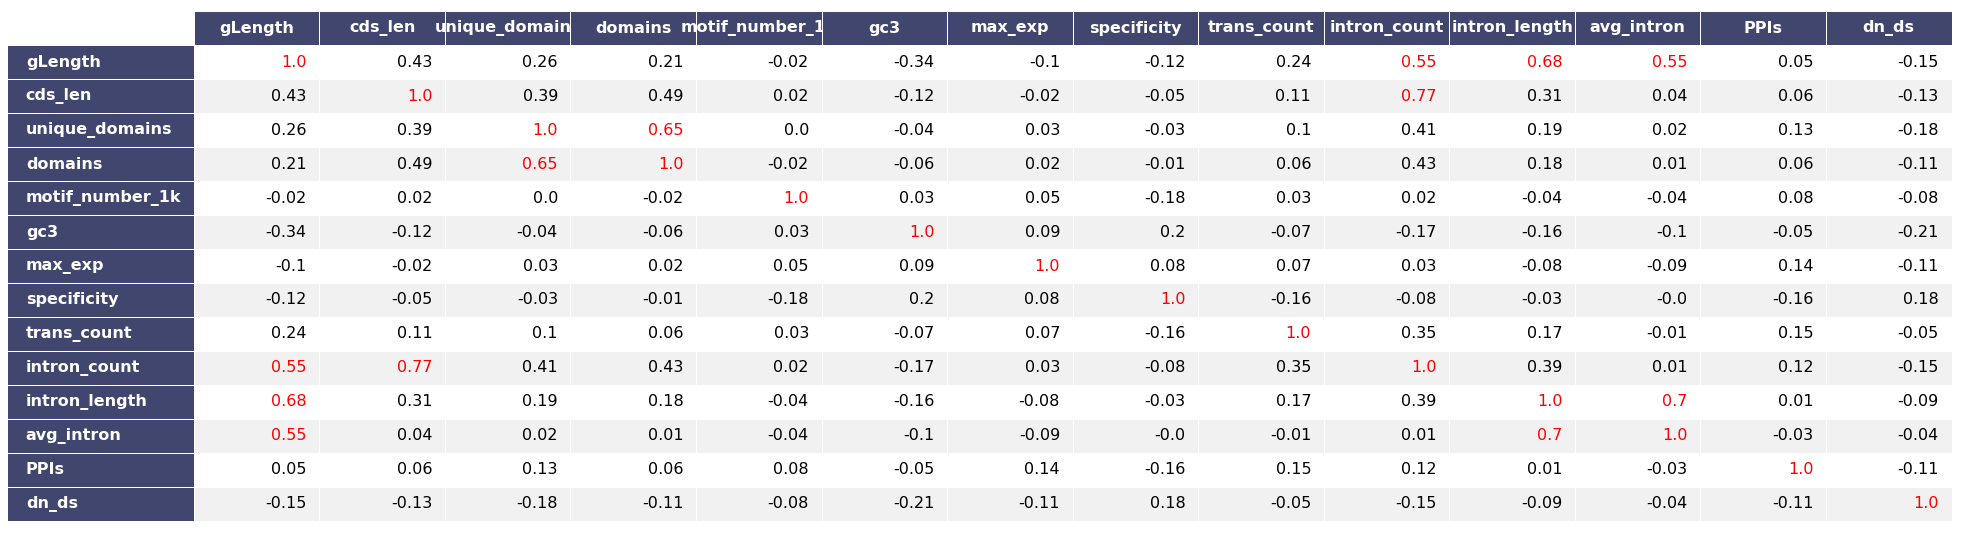

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, title, col_width=3.0, row_height=0.625, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=1,
                     ax=None, cutoff= None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, rowLabels = data.index, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    #for each cell, if the contents are greater than or equal to cutoff, set text color red
        #if not the row labels (x = 0) or column labels (y = -1)
        #.get_text on a cell returns a Text object, have to call get_text on that to actually get text
        
    for x in mpl_table.get_celld(): #gives tuples of cell coordinates, which are the keys for the .get_celld dict
        if x[0] != 0 and x[1] != -1 and abs(float(mpl_table.get_celld()[x].get_text().get_text())) >= cutoff:
            mpl_table.get_celld()[x].set_text_props(color='r')
    
    plt.savefig(title + '.png')
    plt.show()
    
    return ax

render_mpl_table(corr.round(2), 'correlation_table', header_columns=0, col_width=2.25, cutoff=0.5)


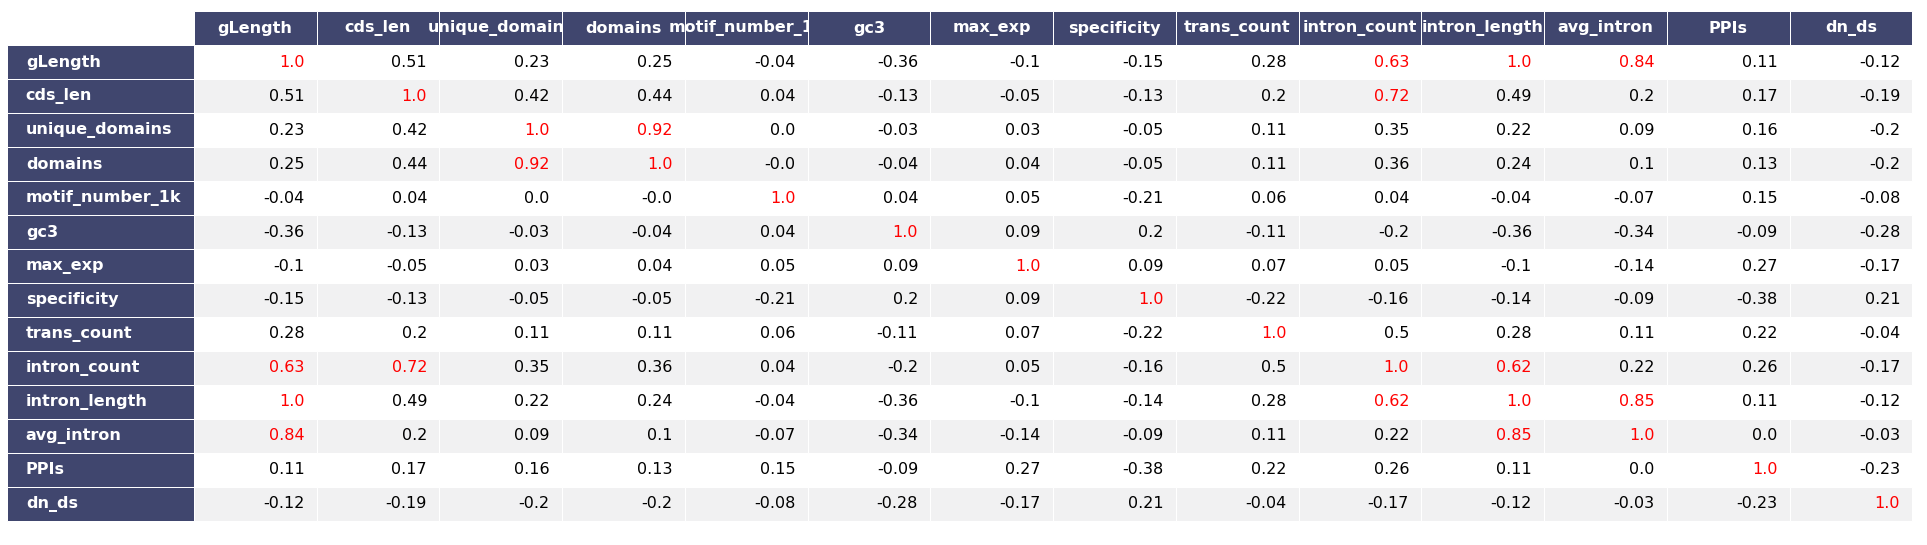

In [43]:
render_mpl_table(corr2.round(2), 'corr_table_spearman', header_columns=0, col_width=2.2, cutoff=0.6)

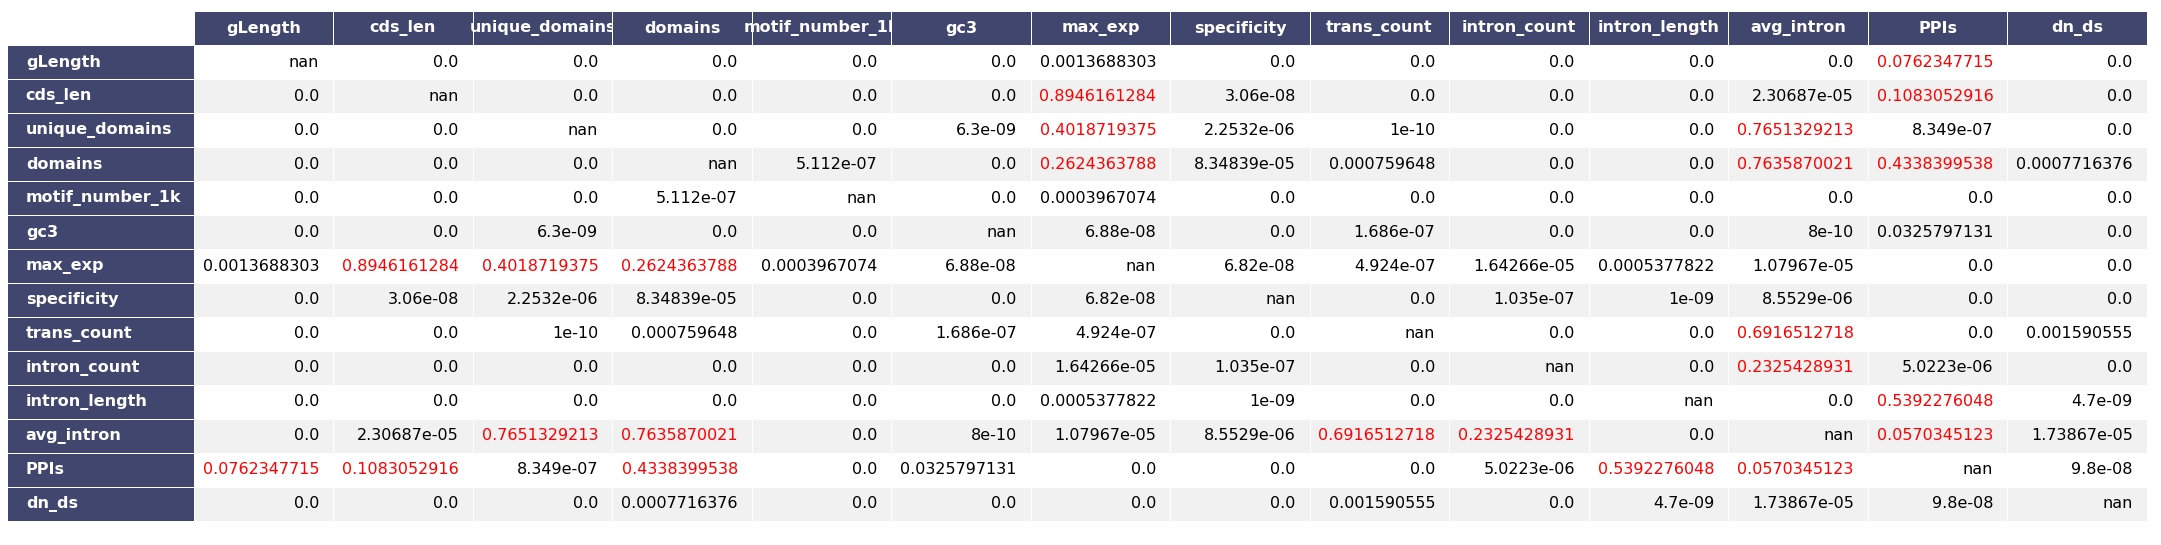

In [14]:
render_mpl_table(pv.round(10),'pval_table', header_columns=0, col_width=2.5, cutoff=0.05)



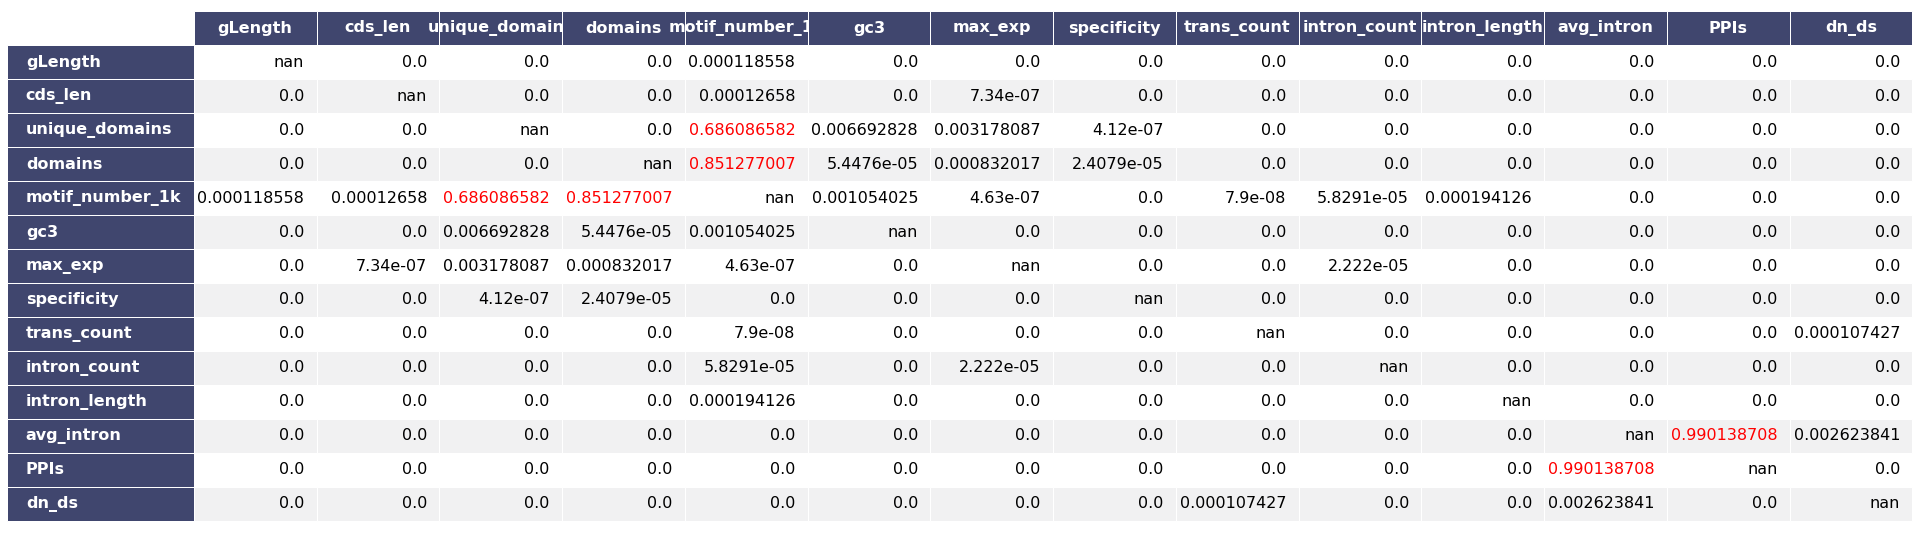

In [45]:
render_mpl_table(pv2.round(9), 'pval_table_spearman', header_columns=0, col_width=2.2, cutoff=0.05)

In [5]:
cursor.execute('''SELECT id, start,end FROM gene_features''')
count = 0
for x in cursor.fetchall():
    if x[1] > x[2]:
        count += 1
count

0

In [86]:
cursor.execute('''UPDATE gene_features SET motif_number_1k = ?''', (None,))
import requests, json, time
o_chrom_list = list(range(1,23))
o_chrom_list.extend(['X', 'Y'])
strand_list = [1,-1]
chrom_list = []
for c in o_chrom_list:
    for i in strand_list:
        chrom_list.append((c,i))
#Maybe cycle through each chromosome and each strand
    #can't specify strand in url, will need to filter
count = 0
t = time.time()
overlapping = 0
too_long = 0
for c, s in chrom_list:
    cursor.execute('''SELECT id, start, end FROM gene_features WHERE chrom == ? AND strand == ?''', (c,s))
    res = cursor.fetchall()
    res = sorted(res, key=lambda x: x[1])
    removal = [] # list of ids that don't meet criteria to filter out at end of loop
    for i in range(0, len(res)): #checking only if current gene is nested or a readthrough
        if i == 0:
            g, st, e = res[i]
            ng, nst, ne = res[i + 1]
            if (st >= nst) and (e <= ne):
                #current gene is nested in next one
                removal.append(g)
            lg, lst, le = g, st, e
        elif i == len(res)-1:
            g, st, e = res[i]
            if (st >= lst) and (e <= le):
                #current gene nested in last one
                removal.append(g)
        else:
            g, st, e = res[i]
            ng, nst, ne = res[i+1]
            if (st >= nst) and (e <= ne):
                removal.append(g)
            elif (st >= lst) and (e <= le):
                removal.append(g)
            elif (st < le) or (e > nst):
                #readthrough
                removal.append(g)
            lg, lst, le = g, st, e
                
    res = list(filter(lambda x: x[0] not in removal, res))       
    # to be used on res after removing nested and readthroughs
    for i in range(0,len(res)):
        g, st, e = res[i]
        if i == 0:
            # for first gene, don't need to check if overlapping with an upstream gene
            int_s = st -1000
            # test if end of the interval (1000 bp downstream of gene end) overlaps with next gene on strand
            test_end = e + 1000
            bar = res[i+1][1]
            if test_end > bar:
                int_e = bar
            else:
                int_e = test_end
        elif i == len(res)-1:
            # for last gene, don't need to check if end overlapping with a downstream gene
            int_e = e + 1000
            # test if start of the interval (1000 bp upstream of gene end) overlaps with last gene on strand
            test_start = st - 1000
            bar = res[i-1][2]
            if test_start < bar:
                int_s = bar
            else:
                int_s = test_start
        else:
            test_start = st - 1000
            test_end = e + 1000
            last_start, last_end = res[i-1][1:3]
            next_start, next_end = res[i+1][1:3]
            
            if test_start < last_end:
                int_s = last_end
            else:
                int_s = test_start
            if test_end > next_start:
                int_e = next_start
            else:
                int_e = test_end
        loc = str(c) + ':' + str(int_s) + '-' + str(int_e)

        url = "http://rest.ensembl.org/overlap/region/human/" + loc + "?feature=motif"
        headers = { "Content-Type" : "application/json"}
        r = requests.get(url, headers=headers).json()
#         try:
        r = list(filter(lambda x: x['strand'] == s, r))
        if r != []:
            cursor.execute('''UPDATE gene_features SET motif_number_1k =? WHERE id == ?''', (len(r), g))
        else:
            cursor.execute('''UPDATE gene_features SET motif_number_1k = 0 WHERE id == ?''', (g,))
#         except TypeError:
#             if 'Cannot request a slice whose start is greater than its end.' in r['error']:
#                 overlapping += 1
#             else:
#                 print(g, r)
        count += 1   
        if count % 500 == 0:
            print(count, 'done.') 
            print('Time since started:', round((time.time()-t)/60, 3), 'minutes')
            print('Taking', (time.time()-t)/count, 'seconds per gene')
        
        
print('Overlapping genes:', overlapping)
db.commit()

500 done.
Time since started: 0.774 minutes
Taking 0.09289646196365356 seconds per gene
1000 done.
Time since started: 1.515 minutes
Taking 0.09087604212760925 seconds per gene
1500 done.
Time since started: 2.263 minutes
Taking 0.09050493478775025 seconds per gene
2000 done.
Time since started: 3.016 minutes
Taking 0.09049409854412079 seconds per gene
2500 done.
Time since started: 3.791 minutes
Taking 0.09097424602508544 seconds per gene
3000 done.
Time since started: 4.555 minutes
Taking 0.09110341739654541 seconds per gene
3500 done.
Time since started: 5.313 minutes
Taking 0.09108503546033586 seconds per gene
4000 done.
Time since started: 6.087 minutes
Taking 0.09130953454971313 seconds per gene
4500 done.
Time since started: 6.833 minutes
Taking 0.09110860935846965 seconds per gene
5000 done.
Time since started: 7.6 minutes
Taking 0.09120523662567138 seconds per gene
5500 done.
Time since started: 8.398 minutes
Taking 0.09161468293450095 seconds per gene
6000 done.
Time since st

In [78]:
cursor.execute('''SELECT motif_number_1k FROM gene_features WHERE id == "ENSG00000187608"''')
print(cursor.fetchall())

[(None,)]


In [27]:
cursor.fetchall()

[('ENSG00000058673', -1),
 ('ENSG00000133055', -1),
 ('ENSG00000174059', -1),
 ('ENSG00000163431', -1),
 ('ENSG00000117834', -1),
 ('ENSG00000143119', -1),
 ('ENSG00000116962', -1),
 ('ENSG00000117335', -1),
 ('ENSG00000116353', -1),
 ('ENSG00000021852', -1),
 ('ENSG00000160803', -1),
 ('ENSG00000162885', -1),
 ('ENSG00000250719', -1),
 ('ENSG00000117461', -1),
 ('ENSG00000215883', -1),
 ('ENSG00000256407', -1),
 ('ENSG00000143001', -1),
 ('ENSG00000184677', -1),
 ('ENSG00000081019', -1),
 ('ENSG00000212916', -1),
 ('ENSG00000134202', -1),
 ('ENSG00000143164', -1),
 ('ENSG00000116793', -1),
 ('ENSG00000270276', -1),
 ('ENSG00000117016', -1),
 ('ENSG00000143320', -1),
 ('ENSG00000118292', -1),
 ('ENSG00000162736', -1),
 ('ENSG00000182004', -1),
 ('ENSG00000162735', -1),
 ('ENSG00000162373', -1),
 ('ENSG00000077585', -1),
 ('ENSG00000198700', -1),
 ('ENSG00000204219', -1),
 ('ENSG00000116703', -1),
 ('ENSG00000184588', -1),
 ('ENSG00000183814', -1),
 ('ENSG00000117480', -1),
 ('ENSG00000

In [10]:
db.close()

# GO enrichment

In [164]:
cursor.execute('''SELECT go FROM GO_terms''')
total_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "WGD"''')
w_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "SSD"''')
s_list = [x[0] for x in cursor.fetchall()]

term_list = list(set(total_list))

M = len(total_list)
w_N = len(w_list)
s_N = len(s_list)

w_enriched, s_enriched  = [], [] 
for t in term_list:
    n = total_list.count(t)
    
    w_k = w_list.count(t)
    s_k = s_list.count(t)
    
    w_pval = stats.hypergeom.sf(w_k-1, M, n, w_N)
    s_pval = stats.hypergeom.sf(s_k-1, M, n, s_N)
    
    if w_pval < 0.05/len(term_list):
        w_enriched.append(t)
    
    if s_pval < 0.05/len(term_list):
        s_enriched.append(t)
# print('WGD')
# for x in w_enriched:
#     cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
#     print(cursor.fetchone())
# print('SSD')
# for x in s_enriched:
#     cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
#     print(cursor.fetchone())

In [165]:
cursor.execute('''SELECT go FROM GO_terms''')
total_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "WGD"''')
w_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "SSD"''')
s_list = [x[0] for x in cursor.fetchall()]

term_list = list(set(total_list))

M = len(total_list)
w_N = len(w_list)
s_N = len(s_list)

w_depleted, s_depleted  = [], [] 
for t in term_list:
    n = total_list.count(t)
    
    w_k = w_list.count(t)
    s_k = s_list.count(t)
    
    w_pval = stats.hypergeom.cdf(w_k, M, n, w_N)
    s_pval = stats.hypergeom.cdf(s_k, M, n, s_N)
    
    if w_pval < 0.05/len(term_list):
        w_depleted.append(t)
    
    if s_pval < 0.05/len(term_list):
        s_depleted.append(t)
# print('WGD')
# for x in w_depleted:
#     cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
#     print(cursor.fetchone())
# print('SSD')
# for x in s_depleted:
#     cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
#     print(cursor.fetchone())

In [15]:
# only getting the top 25(? we'll see how well those capture the gist)

cursor.execute('''SELECT go FROM GO_terms''')
total_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "WGD"''')
w_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "SSD"''')
s_list = [x[0] for x in cursor.fetchall()]

term_list = list(set(total_list))

M = len(total_list)
w_N = len(w_list)
s_N = len(s_list)

w_depleted, s_depleted  = [], [] 
for t in term_list:
    n = total_list.count(t)
    
    w_k = w_list.count(t)
    s_k = s_list.count(t)
    
    w_pval = stats.hypergeom.cdf(w_k, M, n, w_N)
    s_pval = stats.hypergeom.cdf(s_k, M, n, s_N)
    
    if w_pval < 0.05/len(term_list): #if significant, check if it makes the list
        if len(w_depleted) < 25:
            w_depleted.append((t,w_pval))
        elif w_pval < max([x[1] for x in w_depleted]): # makes the cut
            w_depleted.append((t,w_pval))
            w_depleted.sort(key=lambda x: x[1]) #highest pval at the end
            w_depleted.pop() #remove the highest pval term
    if s_pval < 0.05/len(term_list): #if significant, check if it makes the list
        if len(s_depleted) < 25:
            s_depleted.append((t,s_pval))
        elif s_pval < max([x[1] for x in s_depleted]): # makes the cut
            s_depleted.append((t,s_pval))
            s_depleted.sort(key=lambda x: x[1]) #highest pval at the end
            s_depleted.pop() #remove the highest pval term
print('WGD depleted')
for x in w_depleted:
    x = x[0]
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())
print('SSD depleted')
for x in s_depleted:
    x = x[0]
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())
    
#     stats.hypergeom.cdf(x, M, n, N, loc=0) -the inverse of sf

WGD
('olfactory receptor activity',)
('detection of chemical stimulus involved in sensory perception of smell',)
('nucleic acid binding',)
('sensory perception of smell',)
('extracellular region',)
('G-protein coupled receptor activity',)
('response to stimulus',)
('RNA binding',)
('immune response',)
('G-protein coupled receptor signaling pathway',)
('immune system process',)
('integral component of membrane',)
('nucleus',)
('defense response to bacterium',)
('signal transducer activity',)
('complement activation, classical pathway',)
('antigen binding',)
('rRNA processing',)
('mitochondrion',)
('keratinization',)
('intermediate filament',)
('chromosome',)
('intracellular ribonucleoprotein complex',)
('extracellular space',)
('nucleosome',)
SSD
('nucleoplasm',)
('chromosome',)
('phosphorylation',)
('nucleotide binding',)
('kinase activity',)
('protein autophosphorylation',)
('protein phosphorylation',)
('cell cycle',)
('ATP binding',)
('nuclear chromosome, telomeric region',)
('protei

In [16]:
# only getting the top 25(? we'll see how well those capture the gist)

cursor.execute('''SELECT go FROM GO_terms''')
total_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "WGD"''')
w_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "SSD"''')
s_list = [x[0] for x in cursor.fetchall()]

term_list = list(set(total_list))

M = len(total_list)
w_N = len(w_list)
s_N = len(s_list)

w_enriched, s_enriched  = [], [] 
for t in term_list:
    n = total_list.count(t)
    
    w_k = w_list.count(t)
    s_k = s_list.count(t)
    
    w_pval = stats.hypergeom.sf(w_k-1, M, n, w_N)
    s_pval = stats.hypergeom.sf(s_k-1, M, n, s_N)
    
    if w_pval < 0.05/len(term_list): #if significant, check if it makes the list
        if len(w_enriched) < 25:
            w_enriched.append((t,w_pval))
        elif w_pval < max([x[1] for x in w_enriched]): # makes the cut
            w_enriched.append((t,w_pval))
            w_enriched.sort(key=lambda x: x[1]) #highest pval at the end
            w_enriched.pop() #remove the highest pval term
    if s_pval < 0.05/len(term_list): #if significant, check if it makes the list
        if len(s_enriched) < 25:
            s_enriched.append((t,s_pval))
        elif s_pval < max([x[1] for x in s_enriched]): # makes the cut
            s_enriched.append((t,s_pval))
            s_enriched.sort(key=lambda x: x[1]) #highest pval at the end
            s_enriched.pop() #remove the highest pval term
print('WGD enriched')
for x in w_enriched:
    x = x[0]
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())
print('SSD enriched')
for x in s_enriched:
    x = x[0]
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())
    
#     stats.hypergeom.cdf(x, M, n, N, loc=0) -the inverse of sf

WGD enriched
('protein phosphorylation',)
('protein kinase activity',)
('intracellular signal transduction',)
('positive regulation of transcription from RNA polymerase II promoter',)
('kinase activity',)
('phosphorylation',)
('sequence-specific DNA binding',)
('protein serine/threonine kinase activity',)
('positive regulation of transcription, DNA-templated',)
('RNA polymerase II core promoter proximal region sequence-specific DNA binding',)
('protein autophosphorylation',)
('transcription factor complex',)
('transcriptional activator activity, RNA polymerase II core promoter proximal region sequence-specific binding',)
('synapse',)
('peptidyl-serine phosphorylation',)
('regulation of small GTPase mediated signal transduction',)
('canonical Wnt signaling pathway',)
('transcription factor binding',)
('ruffle membrane',)
('peptidyl-tyrosine phosphorylation',)
('axon guidance',)
('intracellular receptor signaling pathway',)
('actin cytoskeleton organization',)
('protein tyrosine kinase a

In [19]:
# only getting the top 25(? we'll see how well those capture the gist)
from tqdm import tqdm
cursor.execute('''SELECT go FROM GO_terms''')
total_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "singleton" OR dup_type_T2 == "singleton-ish"''')
si_list = [x[0] for x in cursor.fetchall()]

term_list = list(set(total_list))

M = len(total_list)
si_N = len(si_list)


si_enriched, si_depleted  = [], [] 
for t in tqdm(term_list):
    n = total_list.count(t)
    
    si_k = si_list.count(t)
    
    si_en_pval = stats.hypergeom.sf(si_k-1, M, n, si_N)
    si_d_pval = stats.hypergeom.cdf(si_k, M, n, si_N)
    
    if si_en_pval < 0.05/len(term_list): #if significant, check if it makes the list
        if len(si_enriched) < 25:
            si_enriched.append((t,si_en_pval))
        elif si_en_pval < max([x[1] for x in si_enriched]): # makes the cut
            si_enriched.append((t,si_en_pval))
            si_enriched.sort(key=lambda x: x[1]) #highest pval at the end
            si_enriched.pop() #remove the highest pval term
    if si_d_pval < 0.05/len(term_list): #if significant, check if it makes the list
        if len(si_depleted) < 25:
            si_depleted.append((t,si_d_pval))
        elif si_d_pval < max([x[1] for x in si_depleted]): # makes the cut
            si_depleted.append((t,si_d_pval))
            si_depleted.sort(key=lambda x: x[1]) #highest pval at the end
            si_depleted.pop() #remove the highest pval term
print('Singleton enriched')
for x in si_enriched:
    x = x[0]
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())
print('Singleton depleted')
for x in si_depleted:
    x = x[0]
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())
    
#     stats.hypergeom.cdf(x, M, n, N, loc=0) -the inverse of sf

100%|██████████| 17702/17702 [37:26<00:00,  7.88it/s] 


Singleton enriched
('mitochondrion',)
('RNA binding',)
('nucleoplasm',)
('rRNA processing',)
('DNA repair',)
('translation',)
('mitochondrial inner membrane',)
('cellular response to DNA damage stimulus',)
('nucleolus',)
('ribosome',)
('mitochondrial matrix',)
('mitochondrial translational elongation',)
('intracellular ribonucleoprotein complex',)
('mitochondrial translational termination',)
('protein binding',)
('structural constituent of ribosome',)
('ribosome biogenesis',)
('cytosol',)
('cilium',)
('DNA replication',)
('viral transcription',)
('translational initiation',)
('tRNA processing',)
('mRNA splicing, via spliceosome',)
('mitochondrial large ribosomal subunit',)
Singleton depleted
('G-protein coupled receptor activity',)
('plasma membrane',)
('signal transducer activity',)
('signal transduction',)
('G-protein coupled receptor signaling pathway',)
('olfactory receptor activity',)
('detection of chemical stimulus involved in sensory perception of smell',)
('integral component 

In [26]:
# making a csv of results to make latex table 
results = zip(w_enriched, s_enriched,si_enriched, w_depleted, s_depleted, si_depleted)
with open('GO_results_25.csv','w') as file:
    file.write('WGD enriched, ,SSD enriched, ,Singleton enriched, ,WGD depleted, ,SSD depleted, ,Singleton depleted\n')
    
    for line in results:
        results2 = []
        for ID in [z[0] for z in line]:
            print(ID)
            cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (ID,))
            name = cursor.fetchone()[0]
            if ',' in name:
                name = name.replace(',',':')
            results2.append(ID)
            results2.append(name)
        line = ','.join(results2) + '\n'
        file.write(line)

GO:0006468
GO:0005576
GO:0005739
GO:0004984
GO:0005654
GO:0004930
GO:0004672
GO:0003676
GO:0003723
GO:0050911
GO:0005694
GO:0005886
GO:0035556
GO:0002376
GO:0005654
GO:0003676
GO:0016310
GO:0004871
GO:0045944
GO:0006955
GO:0006364
GO:0007608
GO:0000166
GO:0007165
GO:0016301
GO:0003823
GO:0006281
GO:0005576
GO:0016301
GO:0007186
GO:0016310
GO:0005615
GO:0006412
GO:0004930
GO:0046777
GO:0004984
GO:0043565
GO:0004252
GO:0005743
GO:0050896
GO:0006468
GO:0050911
GO:0004674
GO:0002250
GO:0006974
GO:0003723
GO:0007049
GO:0005887
GO:0045893
GO:0005622
GO:0005730
GO:0006955
GO:0005524
GO:0007608
GO:0000978
GO:0050776
GO:0005840
GO:0007186
GO:0000784
GO:0050896
GO:0046777
GO:0006958
GO:0005759
GO:0002376
GO:0004672
GO:0003700
GO:0005667
GO:0046872
GO:0070125
GO:0016021
GO:0030529
GO:0005622
GO:0001077
GO:0031424
GO:0030529
GO:0005634
GO:0016740
GO:0016021
GO:0045202
GO:0006355
GO:0070126
GO:0042742
GO:0003723
GO:0006958
GO:0018105
GO:0070268
GO:0005515
GO:0004871
GO:0004674
GO:0003823
GO:0051056

In [166]:
cursor.execute('''SELECT go FROM GO_terms''')
total_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "singleton"''')
si_list = [x[0] for x in cursor.fetchall()]



term_list = list(set(total_list))

M = len(total_list)
si_N = len(si_list)

si_enriched, si_depleted  = [], [] 
for t in term_list:
    n = total_list.count(t)
    
    si_k = si_list.count(t)
    
    
    si_en_pval = stats.hypergeom.sf(si_k-1, M, n, si_N)
    si_dep_pval = stats.hypergeom.cdf(si_k, M, n, si_N)
    
    if si_en_pval < 0.05/len(term_list):
        si_enriched.append(t)
    
    if si_dep_pval < 0.05/len(term_list):
        si_depleted.append(t)
print('Singleton enriched')
for x in si_enriched:
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())
for i in range(0,10):
    print('')
print('Singleton depleted:')
for x in si_depleted:
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())

Singleton enriched
('regulation of transcription from RNA polymerase I promoter',)
('unfolded protein binding',)
('protein import into peroxisome matrix',)
('negative regulation of ubiquitin protein ligase activity',)
('small protein activating enzyme binding',)
('chaperonin-containing T-complex',)
('Ino80 complex',)
('protoporphyrinogen IX biosynthetic process',)
('secretory granule lumen',)
('type 3 melanocortin receptor binding',)
('regulation of glycolytic process',)
('translational termination',)
('STAGA complex',)
('cytosol',)
('formation of translation preinitiation complex',)
('ribonuclease P activity',)
('positive regulation of interleukin-10 production',)
('intraciliary transport particle B',)
('meiotic chromosome condensation',)
('cellular_component',)
('tryptophan catabolic process',)
('protein ufmylation',)
('axoneme',)
('centriole',)
('chromosome, centromeric region',)
('protein import into nucleus',)
('lysosome',)
('double-strand break repair via nonhomologous end joinin

('DNA topoisomerase binding',)
('Ku70:Ku80 complex',)
('DNA catabolic process, endonucleolytic',)
('GPI-anchor transamidase activity',)
('spliceosomal snRNP assembly',)
('histidine catabolic process',)
('catalytic step 2 spliceosome',)
('tRNA-intron endonuclease activity',)
('RNA polymerase II activity',)
('ESCRT II complex',)
('RNA polymerase III type 1 promoter DNA binding',)
('box H/ACA snoRNA binding',)
('growth cone membrane',)
('U6 snRNP',)
('dolichyl diphosphate biosynthetic process',)
("mRNA 3'-end processing",)
('protein localization to kinetochore',)
('regulation of translational initiation',)
('nucleus',)
('depyrimidination',)
("single-stranded DNA 3'-5' exodeoxyribonuclease activity",)
('mitochondrial intermembrane space',)
('nuclear-transcribed mRNA catabolic process',)
('DNA-directed RNA polymerase I complex',)
('core mediator complex',)
('shelterin complex',)
('nuclear pore outer ring',)
('positive regulation of chromosome segregation',)
('methylosome',)
('positive regul

('negative regulation of necrotic cell death',)
('DNA biosynthetic process',)
('nucleoplasm',)
('nuclear envelope',)
('glycosylphosphatidylinositol-N-acetylglucosaminyltransferase (GPI-GnT) complex',)
('nuclear-transcribed mRNA catabolic process, nonsense-mediated decay',)
('positive regulation of defense response to virus by host',)
('aminoacyl-tRNA ligase activity',)
('ribosomal large subunit assembly',)
('chromosome',)
('nucleolus',)
('electron carrier activity',)
('mitochondrial respiratory chain complex I',)
('cytosolic small ribosomal subunit',)
('positive regulation of corticotropin secretion',)
('eukaryotic 43S preinitiation complex',)
('endodermal cell fate commitment',)
('mitochondrial ATP synthesis coupled electron transport',)
('nuclear membrane',)
('nuclear chromosome, telomeric region',)
('positive regulation of proteasomal protein catabolic process',)
('dimethylallyltranstransferase activity',)
('NADH dehydrogenase activity',)
('positive regulation of catalytic activity'

('spliceosomal complex assembly',)
('ribonuclease MRP complex',)
('male meiotic nuclear division',)
('GPI-anchor transamidase complex',)
('DNA repair',)
('mitochondrion to lysosome transport',)
('cellular response to DNA damage stimulus',)
('cotranslational protein targeting to membrane',)
('protein localization to centrosome',)
('tRNA transcription from RNA polymerase III promoter',)
('DNA-dependent DNA replication',)
('kinetochore assembly',)
('mediator complex',)
('DNA damage response, detection of DNA damage',)
('chromosome condensation',)
('MCM complex',)
('termination of RNA polymerase II transcription',)
('protein lipoylation',)
('maturation of SSU-rRNA',)
('ubiquitin-like protein conjugating enzyme binding',)
('iron-sulfur cluster assembly',)
('TORC1 complex',)
('interleukin-2 receptor binding',)
('cilium organization',)
('Ctf18 RFC-like complex',)
('NIK/NF-kappaB signaling',)
('fibrillar center',)
('transcription from mitochondrial promoter',)
('adenosine catabolic process',)


('response to exogenous dsRNA',)
('neuron projection',)
('ion transmembrane transport',)
('microtubule motor activity',)
('muscle filament sliding',)
('embryonic hindlimb morphogenesis',)
('clathrin adaptor complex',)
('stress fiber',)
('transcriptional activator activity, RNA polymerase II core promoter proximal region sequence-specific binding',)
('channel activity',)
('basolateral plasma membrane',)
('neurotransmitter receptor activity',)
('peptidase activity',)
('type I interferon signaling pathway',)
('membrane depolarization during action potential',)
('plasma membrane',)
('epithelial to mesenchymal transition',)
('signal transduction involved in regulation of gene expression',)
('actin cytoskeleton reorganization',)
('phagocytic cup',)
('calcium-dependent cell-cell adhesion via plasma membrane cell adhesion molecules',)
('sodium ion transport',)
('negative regulation of megakaryocyte differentiation',)
('negative regulation of adenylate cyclase activity',)
('monooxygenase activi

In [185]:
cursor.execute('''SELECT go FROM GO_terms''')
total_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "mix"''')
mi_list = [x[0] for x in cursor.fetchall()]



term_list = list(set(total_list))

M = len(total_list)
mi_N = len(mi_list)

mi_enriched, mi_depleted  = [], [] 
for t in term_list:
    n = total_list.count(t)
    
    mi_k = mi_list.count(t)
    
    
    mi_en_pval = stats.hypergeom.sf(mi_k-1, M, n, mi_N)
    mi_dep_pval = stats.hypergeom.cdf(mi_k, M, n, mi_N)
    
    if mi_en_pval < 0.05/len(term_list):
        mi_enriched.append(t)
    
    if mi_dep_pval < 0.05/len(term_list):
        mi_depleted.append(t)
print('Mix enriched')
for x in mi_enriched:
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())
for i in range(0,10):
    print('')
print('Mix depleted:')
for x in mi_depleted:
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())

Mix enriched
('phosphatidylinositol-3,4-bisphosphate 5-kinase activity',)
('release of sequestered calcium ion into cytosol',)
('Roundabout binding',)
('transmembrane receptor protein serine/threonine kinase activity',)
('positive regulation of peptidyl-tyrosine phosphorylation',)
('activin receptor activity, type I',)
('regulation of G-protein coupled receptor protein signaling pathway',)
('cGMP biosynthetic process',)
('positive regulation of cell differentiation',)
('negative regulation of ceramide biosynthetic process',)
('hair follicle development',)
('B cell activation',)
('positive regulation of mesenchymal stem cell differentiation',)
('cerebral cortex GABAergic interneuron differentiation',)
('negative regulation of extrinsic apoptotic signaling pathway',)
('regulation of wound healing',)
('secretion by cell',)
('embryonic placenta development',)
('regulation of Rho protein signal transduction',)
('negative regulation of myosin-light-chain-phosphatase activity',)
('vasopressin

('axis elongation involved in somitogenesis',)
('filopodium',)
('cytoplasmic vesicle',)
('L-alpha-amino acid transmembrane transport',)
('unfolded protein binding',)
('regulation of transcription from RNA polymerase II promoter',)
('activation of JNKK activity',)
('transcription factor activity, RNA polymerase II core promoter proximal region sequence-specific binding',)
('receptor complex',)
('regulation of epidermal growth factor receptor signaling pathway',)
('cytoskeleton',)
('positive regulation of protein sumoylation',)
('stress fiber',)
('cytoplasmic vesicle membrane',)
('amyloid-beta binding',)
('ERK1 and ERK2 cascade',)
('transcription coactivator binding',)
('Wnt-protein binding',)
('microvillus',)
('regulation of molecular function',)
('hydrogen ion transmembrane transporter activity',)
('proteinaceous extracellular matrix',)
('insulin-like growth factor receptor signaling pathway',)
('positive regulation of Ras protein signal transduction',)
('establishment or maintenance o

("3'-phosphoadenosine 5'-phosphosulfate biosynthetic process",)
('phosphatidylinositol phospholipase C activity',)
('G-protein coupled glutamate receptor binding',)
('semaphorin receptor complex',)
('SH3/SH2 adaptor activity',)
('cellular response to fatty acid',)
('negative regulation of keratinocyte differentiation',)
('positive regulation of gene silencing by miRNA',)
('embryonic skeletal joint development',)
('cell proliferation in forebrain',)
('protein complex scaffold activity',)
('sympathetic nervous system development',)
('cell leading edge',)
('mitotic nuclear envelope reassembly',)
('actin filament network formation',)
('regulation of RNA biosynthetic process',)
('regulation of organelle assembly',)
('repressing transcription factor binding',)
('ruffle',)
('negative regulation of cardiac muscle cell differentiation',)
('transcription regulatory region DNA binding',)
('amino acid transmembrane transport',)
('clathrin heavy chain binding',)
('regulation of fatty acid metabolic

('procollagen galactosyltransferase activity',)
('regulation of potassium ion transmembrane transporter activity',)
('positive regulation of phosphatidylinositol 3-kinase signaling',)
('regulation of mitotic cell cycle',)
('Ral guanyl-nucleotide exchange factor activity',)
('calyx of Held',)
('suckling behavior',)
('methenyltetrahydrofolate cyclohydrolase activity',)
('smooth muscle cell differentiation',)
('cell differentiation',)
('semaphorin-plexin signaling pathway',)
('positive regulation of receptor biosynthetic process',)
('protein secretion',)
('regulation of branching involved in prostate gland morphogenesis',)
('cellular response to potassium ion starvation',)
('blood vessel morphogenesis',)
('prepulse inhibition',)
('actin cytoskeleton',)
('transmembrane receptor protein tyrosine kinase signaling pathway',)
('neuroblast proliferation',)
('activation of MAPKK activity',)
('response to organic cyclic compound',)
('ATP hydrolysis coupled proton transport',)
('response to glucoc

('FK506 binding',)
('response to amino acid',)
('epidermal growth factor receptor signaling pathway',)
('phosphatidylinositol-4,5-bisphosphate 3-kinase activity',)
('alpha1-adrenergic receptor activity',)
('clathrin coat of coated pit',)
('forebrain cell migration',)
('regulation of vascular permeability',)
('receptor clustering',)
('glycogen metabolic process',)
('establishment of body hair planar orientation',)
('nitric oxide biosynthetic process',)
('negative regulation of stem cell differentiation',)
('negative regulation of hippo signaling',)
('guanyl-nucleotide exchange factor activity',)
('response to organic substance',)
('core promoter sequence-specific DNA binding',)
('glucose import',)
('thyroid gland development',)
('forebrain dorsal/ventral pattern formation',)
('epithelial cell proliferation involved in renal tubule morphogenesis',)
('B-1 B cell homeostasis',)
('transcription factor activity, transcription factor binding',)
('pituitary gland development',)
('messenger rib

('procollagen-proline 3-dioxygenase activity',)
('behavioral fear response',)
('RNA polymerase II activating transcription factor binding',)
('mitochondrial transport',)
('protein palmitoylation',)
('cochlea morphogenesis',)
('negative regulation of protein localization to microtubule',)
('regulation of transcription, DNA-templated',)
('myosin complex',)
('Golgi vesicle budding',)
('transmembrane transporter activity',)
('protein complex binding',)
('mammary gland duct morphogenesis',)
('adult locomotory behavior',)
('alternative mRNA splicing, via spliceosome',)
('central nervous system neuron differentiation',)
('morphogenesis of an epithelial fold',)
('potassium ion transport',)
('regulation of ryanodine-sensitive calcium-release channel activity',)
('syntrophin complex',)
('epithelial cell differentiation',)
('membrane protein intracellular domain proteolysis',)
('protein homodimerization activity',)
('pri-miRNA transcription from RNA polymerase II promoter',)
('regulation of respo

('ectoderm development',)
('synapse assembly',)
('serotonergic neuron axon guidance',)
('positive regulation of cholesterol efflux',)
('neuronal action potential propagation',)
('regulation of metanephric nephron tubule epithelial cell differentiation',)
('forebrain neuron development',)
('positive regulation of protein binding',)
('muscle cell cellular homeostasis',)
('negative regulation of branching involved in ureteric bud morphogenesis',)
('cellular calcium ion homeostasis',)
('cAMP response element binding',)
('positive regulation of phosphorylation of RNA polymerase II C-terminal domain',)
('cell fate commitment',)
('positive regulation of BMP signaling pathway',)
('intestinal D-glucose absorption',)
('Rab guanyl-nucleotide exchange factor activity',)
('maintenance of cell polarity',)
('spinal cord association neuron differentiation',)
('retinal pigment epithelium development',)
('triglyceride biosynthetic process',)
('cAMP catabolic process',)
('protein phosphatase 2A binding',

('synaptic transmission, GABAergic',)
('presynaptic membrane',)
('positive regulation of sequence-specific DNA binding transcription factor activity',)
('myoblast migration',)
('signaling adaptor activity',)
('histone methylation',)
('neuron projection morphogenesis',)
('muscle contraction',)
('photoreceptor disc membrane',)
('protein phosphatase binding',)
('calmodulin binding',)
('receptor-receptor interaction',)
('negative regulation of interferon-gamma-mediated signaling pathway',)
('heart contraction',)
('protein tyrosine kinase activator activity',)
('cytoskeletal protein binding',)
('positive regulation of osteoblast differentiation',)
('regulation of actin filament-based process',)
('regulation of heart rate by cardiac conduction',)
('platelet degranulation',)
('positive regulation of cell-substrate adhesion',)
('L-serine transmembrane transporter activity',)
('limb morphogenesis',)
('negative regulation of TOR signaling',)
('peptide binding',)
('peripheral nervous system myeli

('cardiac neural crest cell development involved in outflow tract morphogenesis',)
('integral component of synaptic vesicle membrane',)
('potassium channel regulator activity',)
('centrosome localization',)
('cation transport',)
('Rac guanyl-nucleotide exchange factor activity',)
('heart morphogenesis',)
('cardiac atrium morphogenesis',)
('protein domain specific binding',)
('embryonic morphogenesis',)
('intracellular calcium activated chloride channel activity',)
('tube morphogenesis',)
('regulation of protein localization',)
('protein kinase activity',)
('negative regulation of prostatic bud formation',)
('protein serine/threonine kinase activator activity',)
('calcium-release channel activity',)
('negative regulation of inflammatory response',)
('clathrin coat of trans-Golgi network vesicle',)
('cell cycle',)
('miRNA metabolic process',)
('cellular response to insulin-like growth factor stimulus',)
('regulation of protein secretion',)
('synaptic vesicle exocytosis',)
('extracellular

('embryonic nail plate morphogenesis',)
('response to magnesium ion',)
('negative regulation of protein localization to plasma membrane',)
('lateral plasma membrane',)
('histone deacetylase complex',)
('circadian rhythm',)
('cell growth',)
('lamellipodium assembly',)
('RNA polymerase II core promoter proximal region sequence-specific DNA binding',)
('transmembrane receptor protein tyrosine phosphatase activity',)
('ventricular cardiac muscle cell development',)
('perikaryon',)
('chloride transmembrane transport',)
('peptidyl-threonine phosphorylation',)
('transcriptional activator activity, RNA polymerase II distal enhancer sequence-specific binding',)
('somitogenesis',)
('store-operated calcium channel activity',)
('microtubule plus-end binding',)
('response to denervation involved in regulation of muscle adaptation',)
('signal complex assembly',)
('integrin-mediated signaling pathway',)
('establishment of cell polarity',)
('retina layer formation',)
('plasma membrane',)
('cerebral co

In [189]:
s_N/M

0.20033896766187975

In [32]:
print('WGD dep vs Sing. dep:')
print(len(set(w_depleted).intersection(si_depleted)))
print('')

print('WGD dep vs Sing. enr:')
print(len(set(w_depleted).intersection(si_enriched)))
print('')

print('WGD enr vs Sing. enr:')
print(len(set(w_enriched).intersection(si_enriched)))
print('')

print('WGD enr vs Sing. dep:')
print(len(set(w_enriched).intersection(si_depleted)))
print('')

print('SSD dep vs Sing. dep:')
print(len(set(s_depleted).intersection(si_depleted)))
print('')

print('SSD dep vs Sing. enr:')
print(len(set(s_depleted).intersection(si_enriched)))
print('')

print('SSD enr vs Sing. enr:')
print(len(set(s_enriched).intersection(si_enriched)))
print('')

print('SSD enr vs Sing. dep:')
print(len(set(s_enriched).intersection(si_depleted)))
print('')

WGD dep vs Sing. dep:
463

WGD dep vs Sing. enr:
0

WGD enr vs Sing. enr:
298

WGD enr vs Sing. dep:
1

SSD dep vs Sing. dep:
66

SSD dep vs Sing. enr:
85

SSD enr vs Sing. enr:
0

SSD enr vs Sing. dep:
195



In [36]:
a = set(w_depleted).intersection(si_depleted)
b = set(s_depleted).intersection(si_depleted)
d = set(w_depleted).intersection(s_depleted)
print(len(a),len(b))
c = a.intersection(b)
print(len(c), len(d))
c == d

463 66
42 42


True

In [18]:
print(len(set(s_depleted).intersection(w_enriched)))
print(len(set(s_depleted).intersection(w_depleted)))
print(len(set(s_enriched).intersection(w_enriched)))
print(len(set(s_enriched).intersection(w_depleted)))

141
42
2
146


In [7]:
print('WGD')
for x in w_depleted:
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())

WGD
('flavin adenine dinucleotide binding',)
('maturation of SSU-rRNA',)
('proteasome regulatory particle, base subcomplex',)
('metal ion binding',)
('catalytic activity',)
('base-excision repair',)
('small-subunit processome',)
('cellular response to interferon-gamma',)
('serine-type endopeptidase inhibitor activity',)
('transcription initiation from RNA polymerase I promoter',)
('mitochondrial electron transport, NADH to ubiquinone',)
('regulation of glycolytic process',)
('DNA synthesis involved in DNA repair',)
('glutathione derivative biosynthetic process',)
('molecular_function',)
('defense response',)
('chaperone binding',)
('antibacterial humoral response',)
('azurophil granule lumen',)
('telomere organization',)
('nucleus',)
('adaptive immune response',)
('sensory perception of taste',)
('negative regulation of viral entry into host cell',)
('snRNA transcription from RNA polymerase II promoter',)
('DNA binding',)
('antimicrobial humoral response',)
('CCR chemokine receptor bin

('G-protein coupled purinergic nucleotide receptor signaling pathway',)
('ribosomal large subunit biogenesis',)
('preribosome, large subunit precursor',)
('ribosome binding',)
('nuclear-transcribed mRNA catabolic process, nonsense-mediated decay',)
('negative regulation of cysteine-type endopeptidase activity',)
('cytoplasmic translation',)
('hydrogen ion transmembrane transport',)
('ligase activity',)
('microtubule-based process',)
('cysteine-type endopeptidase inhibitor activity',)
('taste receptor activity',)
('telomere maintenance via telomerase',)
('male germ cell nucleus',)
('chromosome segregation',)
('metabolic process',)
('negative regulation of peptidase activity',)
('sperm flagellum',)
('keratin filament',)
('nuclear pore',)
('2 iron, 2 sulfur cluster binding',)
('RNA phosphodiester bond hydrolysis',)
('positive regulation of interleukin-8 secretion',)
('receptor-mediated endocytosis',)
('nuclear exosome (RNase complex)',)
('antigen binding',)
('mitochondrial proton-transpor

In [8]:
print('SSD')
for x in s_depleted:
    cursor.execute('SELECT name FROM GO_terms WHERE go == ?', (x,))
    print(cursor.fetchone())

SSD
('positive regulation of DNA replication',)
('Rac protein signal transduction',)
('Wnt-protein binding',)
('regulation of smoothened signaling pathway',)
('embryonic forelimb morphogenesis',)
('neural crest cell migration',)
('protein phosphorylation',)
('protein ubiquitination',)
('heart development',)
('protein transport',)
('positive regulation of bone mineralization',)
('regulation of G-protein coupled receptor protein signaling pathway',)
('branching morphogenesis of an epithelial tube',)
('Wnt-activated receptor activity',)
('anterior/posterior pattern specification',)
('sialyltransferase activity',)
('dynein light intermediate chain binding',)
('snRNA transcription from RNA polymerase II promoter',)
('chromatin binding',)
('protein N-linked glycosylation via asparagine',)
('RNA polymerase II distal enhancer sequence-specific DNA binding',)
('growth factor binding',)
('GABA-A receptor activity',)
('stabilization of membrane potential',)
('retinoic acid receptor signaling path

('ubiquitin protein ligase activity',)
('AMPA glutamate receptor complex',)
('mitochondrial large ribosomal subunit',)
('regulation of neurotransmitter secretion',)
('outflow tract septum morphogenesis',)
('long-term synaptic potentiation',)
('neuronal cell body',)
('negative regulation of neuron death',)
('actin filament binding',)
('SCF-dependent proteasomal ubiquitin-dependent protein catabolic process',)
('endoplasmic reticulum unfolded protein response',)
('mitochondrial translational elongation',)
('Wnt signaling pathway, planar cell polarity pathway',)
('actin filament',)
('nucleoplasm',)
('neuropeptide receptor activity',)
('pseudopodium',)
('nuclear hormone receptor binding',)
('transcriptional activator activity, RNA polymerase II core promoter proximal region sequence-specific binding',)
('positive regulation of neuron apoptotic process',)
('positive regulation of viral transcription',)
('ubiquitin-dependent ERAD pathway',)
('cell cycle',)
('synaptic transmission, cholinergi

In [19]:
print(len(w_enriched),len(s_enriched),len(w_depleted),len(s_depleted))

652 423 463 305


In [24]:
from scipy.stats import hypergeom
pval = hypergeom.sf(6, 20, 20, 7) # k-1 because is inverse of cdf, eg inverse cdf using k = 7 would give p of 8 or higher
# M= pop
# n = number of 'successes' in pop
# N = number of things chosen from pop
# k = number of successes obtained from choice
pval

1.0

In [3]:
from scipy import stats
stats.hypergeom.cdf(k, M, n, N, loc=0)

0.0

In [97]:
[x for x in w_depleted]

[('GO:0004984', 1.3643366777075625e-145),
 ('GO:0050911', 1.3643366777075625e-145),
 ('GO:0003676', 1.11304448673675e-111),
 ('GO:0007608', 2.0578502202734004e-110),
 ('GO:0005576', 3.351686381184809e-110),
 ('GO:0004930', 1.915204537793236e-92),
 ('GO:0050896', 9.706875311028875e-87),
 ('GO:0003723', 5.190998390489954e-73),
 ('GO:0006955', 9.283141030724317e-72),
 ('GO:0007186', 4.338248952252249e-64),
 ('GO:0002376', 9.032089323335047e-62),
 ('GO:0016021', 3.966572594850437e-61),
 ('GO:0005634', 2.5052919970902717e-58),
 ('GO:0042742', 7.809534452037708e-57),
 ('GO:0004871', 5.828674278325017e-51),
 ('GO:0006958', 2.3165405868416517e-50),
 ('GO:0003823', 2.2806386137040888e-49),
 ('GO:0006364', 4.191606130547639e-48),
 ('GO:0005739', 8.013655405281718e-46),
 ('GO:0031424', 8.178390918197783e-44),
 ('GO:0005882', 5.36309258083621e-43),
 ('GO:0005694', 8.843589730802727e-41),
 ('GO:0030529', 1.268510005723731e-40),
 ('GO:0005615', 1.8985423868358237e-40),
 ('GO:0000786', 3.653944174753

In [19]:
print('WGD')
for x in w_enriched:
    cursor.execute('SELECT domains FROM GO_terms WHERE go == ?', (x,))
    
print('SSD')
for x in s_enriched:
    cursor.execute('SELECT domains FROM GO_terms WHERE go == ?', (x,))
    s_domains = list(set([x[0] for x in cursor.fetchall()]))

WGD
SSD


(1000.0, -40.0)
(0.0, 1.0)
(0.35, 22.5)
(0.0, 22.5)


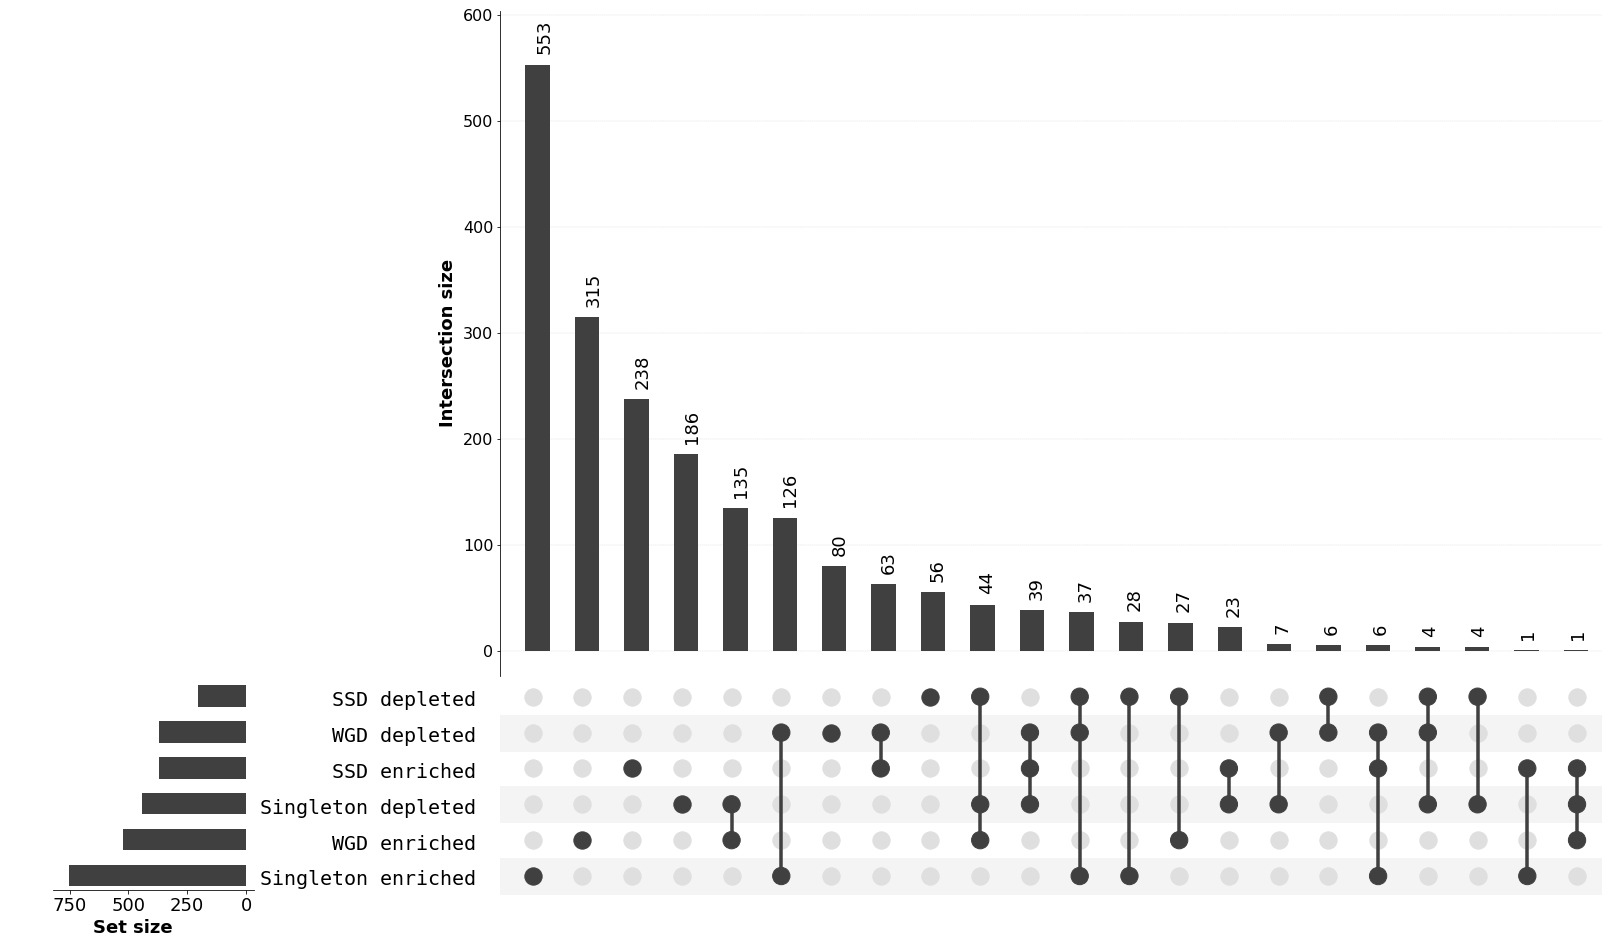

In [185]:
import pyupset as pyu
from pandas import DataFrame
import matplotlib.pyplot as plt
input_ = dict([('WGD enriched',DataFrame([[x] for x in w_enriched],columns=['GO terms'])),
              ('SSD enriched',DataFrame([[x] for x in s_enriched],columns=['GO terms'])),
              ('Singleton enriched',DataFrame([[x] for x in si_enriched],columns=['GO terms'])),
              ('WGD depleted',DataFrame([[x] for x in w_depleted],columns=['GO terms'])),
              ('SSD depleted',DataFrame([[x] for x in s_depleted],columns=['GO terms'])),
              ('Singleton depleted',DataFrame([[x] for x in si_depleted],columns=['GO terms']))])

figure = pyu.plot(input_)
ax1,ax2, ax3, ax4 = figure['figure']._axstack.as_list()
fig = ax1.get_figure()
# fig.set_figwidth(40)
# fig.set_figwidth(40)
# ax1 is the horizontal bar chart, ax2 is the labels, ax3 is the dots along the bottom, ax4 is the top bar chart
# print(ax1.get_xlim())
# print(ax2.get_xlim())
# print(ax3.get_xlim())
# print(ax4.get_xlim())
ax1.set_xlim(1000,-40)
ax1.set_xticks(np.arange(0,1000,250))
ax1.tick_params(axis='x',labelsize=18)

ax1.set_xlabel(ax1.get_xlabel(),fontdict=dict(fontsize=18))

ax3_pos = ax3.get_position()

ax1.set_position([ax3_pos.x0-0.4,ax3_pos.y0+0.015,0.2,ax3_pos.y1])
ax2.set_position([ax3_pos.x0-0.22, ax3_pos.y0-0.005, 0.2, ax3_pos.y1])
ax3.set_position([ax3_pos.x0,ax3_pos.y0,ax3_pos.x1,ax3_pos.y1])
ax4.set_position([ax3_pos.x0,ax3_pos.y0+ax3_pos.y1,ax3_pos.x1,ax4.get_position().y1])


ax2.set_xlim(xmin=0)
for text in ax2.texts:
    text.set_fontsize(20)
for text in ax4.texts:
    text.set_fontsize(20)
    
ax3.set_xlim(xmin=.35,xmax=22.5)
# # ax3.set_visible(False)
ax4.set_xlim(xmin=0,xmax=22.5)
for patch in ax4.patches:
    if patch.get_xy() == (0.5,0):
        patch.set_xy((0.51,0))
        lastCoords = patch.get_xy()
        continue
    else:
        oldX = lastCoords[0]
        newX = oldX + 1.01
        patch.set_xy((newX,0))
        lastCoords = patch.get_xy()
ax4.texts = ax4.texts[:22]
for i in range(0,len(textList)):
    ax4.texts[i].set_text(str(textList[i]))
    ax4.texts[i].set_fontsize(18)
for text in ax4.texts:
    x,y = text._x, text._y
    if x == 1:
        x = x - 0.1
        text.set_position((x,y))
        oldX = x
    else:
        x = oldX + 1.005
        text.set_position((x,y))
        oldX = x

ax4.tick_params(axis='y',labelsize=16)
ax4.set_ylabel(ax4.get_ylabel(),fontdict=dict(fontsize=18))
print(ax1.get_xlim())
print(ax2.get_xlim())
print(ax3.get_xlim())
print(ax4.get_xlim())
# plt.title('GO term enrichment/depletion across duplication categories',fontsize=18)
plt.savefig('GO_terms_upset_plot.png',bbox_inches='tight')
plt.show()

In [172]:
textList = ['553','315','238','186','135','126','80','63','56','44','39','37','28','27','23','7','6','6','4','4','1','1']

In [105]:
print(len(si_enriched))
print(len(w_enriched))
print(len(s_enriched))

print(len(si_depleted))
print(len(w_depleted))
print(len(s_depleted))

751
522
371
443
368
206


In [169]:
textList = []
c = 0
for x in si_enriched:
    if (x not in w_depleted) and (x not in s_depleted) and (x not in w_enriched) and (x not in s_enriched):
        c += 1
textList.append(c)
c = 0
for x in w_enriched:
    if (x not in si_depleted) and (x not in s_depleted) and (x not in si_enriched) and (x not in s_enriched):
        c += 1
textList.append(c)
c = 0
for x in s_enriched:
    if (x not in w_depleted) and (x not in si_depleted) and (x not in w_enriched) and (x not in si_enriched):
        c += 1
textList.append(c)
c = 0
for x in si_depleted:
    if (x not in w_depleted) and (x not in s_depleted) and (x not in w_enriched) and (x not in s_enriched):
        c += 1
textList.append(c)
textList
# si_depleted total = 443
textList.append(443- (186 +44+39+23+7+9))
# # si_enriched total = 751
textList.append(751-(553+37+28+6+1))

In [170]:
# si_depleted total = 443
textList.append(443- (186 +44+39+23+7+9))
# si_enriched total = 751
textList.append(751-(553+37+28+6+1))

In [200]:
problem_children = ((set(s_depleted).intersection(set(w_depleted))).intersection(si_depleted))
cursor.execute('''SELECT go FROM GO_terms''')
total_list = [x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT go FROM GO_terms INNER JOIN gene_features ON GO_terms.id == gene_features.id WHERE dup_type_T2 == "singleton"''')
si_list = [x[0] for x in cursor.fetchall()]



term_list = list(set(total_list))

M = len(total_list)
si_N = len(si_list)

si_enriched, si_depleted  = [], [] 
for t in problem_children:
    n = total_list.count(t)
    
    si_k = w_list.count(t)
    
    
    si_en_pval = stats.hypergeom.sf(si_k-1, M, n, si_N)
    si_dep_pval = stats.hypergeom.cdf(si_k, M, n, si_N)
    
    if si_en_pval < 0.05/len(term_list):
        si_enriched.append(t)
    
    if si_dep_pval < 0.05/len(term_list):
        si_depleted.append(t)

39

In [87]:
len(ax4.patches)

63

In [28]:
# vars(figure['figure'])
figure['figure']._axstack.as_list()

In [6]:
import json, requests
head = {'Content-Type':'application/json'}
url = 'http://rest.ensembl.org/xrefs/name/human/54495?external_db=EntrezGene'
r = requests.get(url, headers=head)
try:
    r = r.json()
except ValueError:
    print(r)
if len(r) != 1:

    if len(r) > 1:
        raise ValueError('Multiple results:', entrez_id)

    else:
        raise ValueError('Query returned empty:', entrez_id, r)
else:
    cursor.execute('''SELECT id FROM gene_features WHERE name == ?''', (r[0]['display_id'],))
    print(cursor.fetchall())

[('ENSG00000166479',)]


In [63]:
# possibly ill-advised attempt at random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler


dataset = pd.read_csv('final_feature_dataset.csv')
dataset = dataset.drop('Unnamed: 0', axis=1)

feature_list = [x for x in dataset if x != 'dup_type']

features = dataset[feature_list]
target = dataset['dup_type']


# gives unbalanced dataset
# train_x, test_x, train_y, test_y = train_test_split(features, target, train_size=0.7)
# test_x.reset_index()
# test_y.reset_index()


sampler = RandomUnderSampler()

new_X, new_Y  = sampler.fit_sample(features, target)
new_X, new_Y = pd.DataFrame(new_X, columns=[x for x in features]), pd.DataFrame(new_Y)

train_x, test_x, train_y, test_y = train_test_split(new_X, new_Y, train_size = 0.7)

train_y, test_y = train_y.values.ravel(), test_y.values.ravel()

rf = RandomForestClassifier()
rf.fit(train_x, train_y)

/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
dataset.describe()

,domains,motif_number_1k,gc3,max_exp,specificity,trans_count,PPIs,dn_ds,PCA1,PCA2
count,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5.996000e+03,5.996000e+03
mean,2.531354,12.434790,60.880935,1.944866,0.818716,5.414943,38.652769,0.252118,-1.341796e-14,1.164216e-15
std,3.430402,15.497389,16.348830,0.545485,0.153278,5.118897,94.575432,0.259342,1.503985e+00,1.096898e+00
min,0.000000,0.000000,23.931624,0.000000,0.291046,1.000000,0.000000,0.000000,-3.061005e+00,-1.003013e+01
25%,1.000000,2.000000,47.147160,1.626930,0.693174,2.000000,3.000000,0.084290,-9.830524e-01,-4.536233e-01
50%,2.000000,8.000000,61.838440,1.934498,0.852144,4.000000,14.000000,0.180505,-2.265838e-01,-1.422438e-01
75%,3.000000,17.000000,74.725774,2.245513,0.961299,7.000000,40.000000,0.341012,7.394712e-01,2.625490e-01
max,103.000000,498.000000,97.193878,5.391993,1.000000,152.000000,2862.000000,5.727980,1.672142e+01,1.539985e+01


In [115]:
print(list(target).count('WGD'))
print(list(target).count('SSD'))

3645
2351


In [116]:
print(list(train_t).count('WGD'))
print(list(train_t).count('SSD'))

print(list(test_t).count('WGD'))
print(list(test_t).count('SSD'))

2555
1642
1090
709


In [31]:
pred = rf.predict(test_x)
# test_y = pd.DataFrame(test_y)

In [33]:
print('predicted', 'actual')
for i in range(0,20):
    print(pred[i], test_y[i])

predicted actual
WGD WGD
SSD SSD
SSD WGD
SSD SSD
SSD SSD
SSD SSD
WGD SSD
SSD SSD
WGD WGD
SSD SSD
SSD SSD
WGD SSD
WGD SSD
SSD SSD
SSD SSD
SSD SSD
SSD WGD
WGD WGD
SSD SSD
SSD SSD


In [43]:
list(test_y).count('WGD')

688

In [94]:
# train_y = pd.DataFrame(train_y)

accuracy_score(train_y, rf.predict(train_x))

0.98754178061379516

In [95]:
accuracy_score(test_y, rf.predict(test_x))

0.67682494684620831

In [91]:
tn, fp, fn, tp = confusion_matrix(test_y, rf.predict(test_x)).ravel()

In [92]:
print('false positives:', fp)
print('false negative:', fn)

false positives: 211
false negative: 245


In [111]:
tn, fp, fn, tp = confusion_matrix(test_y, est.predict(test_x)).ravel()

In [112]:
print('using best estimator')
print('false positives:', fp)
print('false negative:', fn)

using best estimator
false positives: 252
false negative: 176


In [96]:
tp

435

Feature ranking:
1. feature 4 (0.142029)
2. feature 8 (0.126677)
3. feature 7 (0.123253)
4. feature 2 (0.115028)
5. feature 9 (0.112626)
6. feature 3 (0.103053)
7. feature 1 (0.083306)
8. feature 6 (0.081122)
9. feature 5 (0.059677)
10. feature 0 (0.053228)


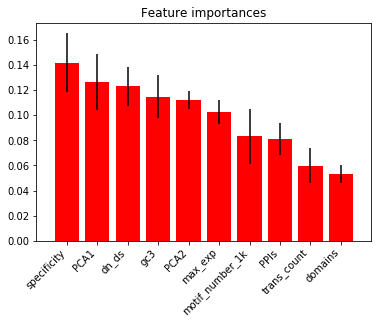

In [97]:
import numpy as np
import matplotlib.pyplot as plt
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()
plt.title("Feature importances")
plt.bar(range(train_f.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices, rotation=45, ha='right')
ax.xaxis.set_ticklabels([x for x in features][i] for i in indices)

plt.xlim([-1, train_x.shape[1]])
plt.savefig('rf_feature_importance.png', bbox_inches='tight')
plt.show()

Feature ranking:
1. feature 7 (0.165192)
2. feature 8 (0.145051)
3. feature 4 (0.143776)
4. feature 1 (0.107698)
5. feature 2 (0.094765)
6. feature 9 (0.093388)
7. feature 3 (0.092803)
8. feature 6 (0.064275)
9. feature 0 (0.056860)
10. feature 5 (0.036191)


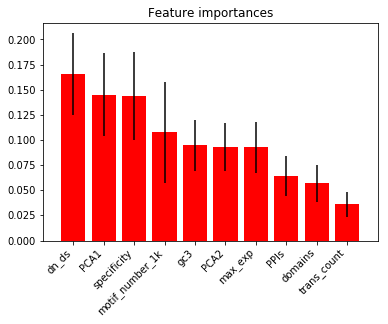

In [84]:
import numpy as np
import matplotlib.pyplot as plt
importances = est.feature_importances_
std = np.std([tree.feature_importances_ for tree in est.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices, rotation=45, ha='right')
ax.xaxis.set_ticklabels([x for x in features][i] for i in indices)

plt.xlim([-1, train_x.shape[1]])
plt.savefig('rf_feature_importance.png', bbox_inches='tight')
plt.show()

In [108]:
score = []
for n in range(1,400):
    rf = RandomForestClassifier(n_estimators=n)
    val = cross_val_score(rf, train_x, train_y, cv=10)
    score.append(list(val))

KeyboardInterrupt: 

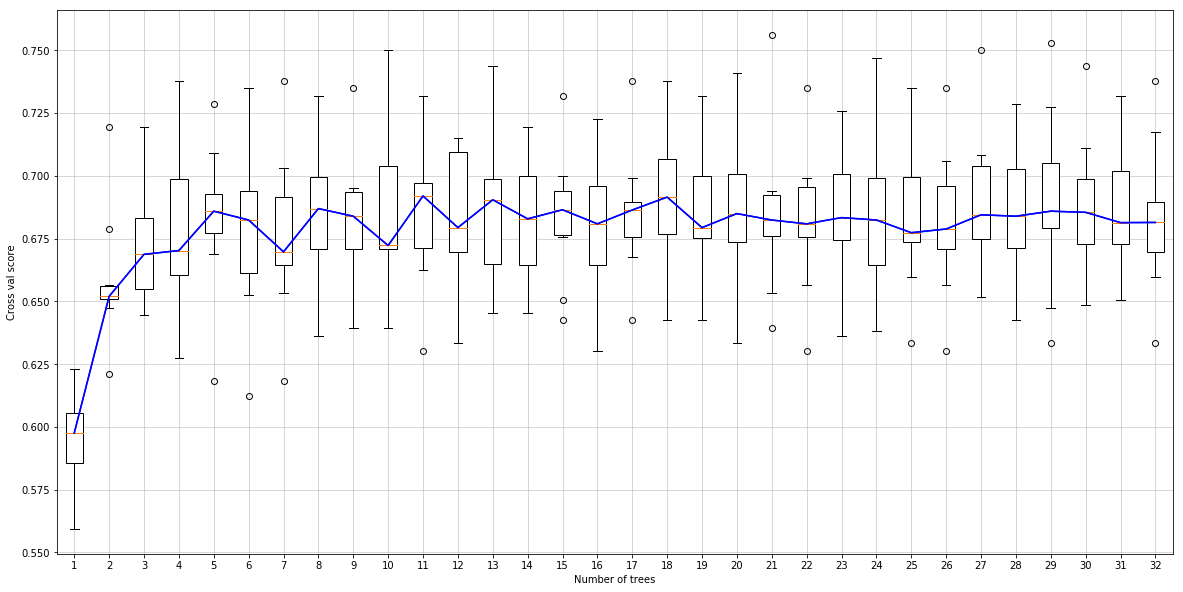

In [110]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,10))
score = score[::10]
boxes = ax.boxplot(score, zorder=350, patch_artist=True)
x_list, y_list = [],[]
for b in boxes['boxes']:
    b.set_facecolor('w')
for m in boxes['medians']:
    xs = m._x
    x = np.mean(xs)
    y = m._y
    x_list.append(x)
    y_list.append(y)
ax.plot(x_list, y_list, color='b', zorder=3423)
ax.grid(linewidth=0.5, zorder=-1)
ax.set_xlabel('Number of trees')
ax.set_ylabel('Cross val score')
plt.savefig('cross_val_rf.png')
plt.show()

In [73]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = "tree.dot", feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('decision_tree.png')

In [75]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [76]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_x, train_y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1 
[CV] bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1, total=   3.1s
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=2000, min_samples_split=5, min_samples_leaf=1 
[CV] bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=2000, min_samples_split=5, min_sa

[CV] bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=800, min_samples_split=5, min_samples_leaf=1 
[CV]  bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=800, min_samples_split=5, min_samples_leaf=1, total=   8.0s
[CV] bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=800, min_samples_split=5, min_samples_leaf=1 
[CV]  bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=800, min_samples_split=5, min_samples_leaf=1, total=   8.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=2000, min_samples_split=10, min_samples_leaf=1 
[CV]  bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=800, min_samples_split=5, min_samples_leaf=1, total=   8.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=2000, min_samples_split=10, min_samples_leaf=1 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=2000, min_samples_split=10, min_samples_leaf=1, total=  17.4s
[CV] bootstrap=False, 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min


[CV]  bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=2000, min_samples_split=10, min_samples_leaf=1, total=  18.4s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=1600, min_samples_split=5, min_samples_leaf=2 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=2000, min_samples_split=10, min_samples_leaf=1, total=  18.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=1600, min_samples_split=5, min_samples_leaf=2 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=1600, min_samples_split=5, min_samples_leaf=2, total=  14.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=1600, min_samples_split=5, min_samples_leaf=2 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=1600, min_samples_split=5, min_samples_leaf=2, total=  14.7s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, n_estimators=800, min_samples_split=10, min_samples_leaf=2 
[CV]  bootstrap=Fa

[CV] bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=1400, min_samples_split=5, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=None, max_features=auto, n_estimators=1800, min_samples_split=2, min_samples_leaf=2, total=  15.6s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=1400, min_samples_split=5, min_samples_leaf=1 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, total=  15.9s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=1400, min_samples_split=5, min_samples_leaf=1 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=1400, min_samples_split=5, min_samples_leaf=1, total=  15.5s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=400, min_samples_split=2, min_samples_leaf=1 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=400, min_samples_split=2, min_samples_leaf=1, total=   4.2s
[CV] bootstrap=Fa

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=800, min_samples_split=10, min_samples_leaf=2, total=   7.4s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=800, min_samples_split=10, min_samples_leaf=2 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, n_estimators=1800, min_samples_split=2, min_samples_leaf=4, total=  12.2s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=800, min_samples_split=10, min_samples_leaf=2 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=800, min_samples_split=10, min_samples_leaf=2, total=   7.6s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=1200, min_samples_split=5, min_samples_leaf=2 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=800, min_samples_split=10, min_samples_leaf=2, total=   7.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=1200, min_samples_split=5, min_samples_leaf=2 
[CV]  bootstrap=True, m

[CV]  bootstrap=True, max_depth=90, max_features=auto, n_estimators=2000, min_samples_split=2, min_samples_leaf=2, total=  14.3s
[CV] bootstrap=True, max_depth=90, max_features=auto, n_estimators=2000, min_samples_split=2, min_samples_leaf=2 
[CV]  bootstrap=True, max_depth=90, max_features=auto, n_estimators=2000, min_samples_split=2, min_samples_leaf=2, total=  14.4s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=400, min_samples_split=10, min_samples_leaf=4 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=400, min_samples_split=10, min_samples_leaf=4, total=   3.5s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=400, min_samples_split=10, min_samples_leaf=4 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=400, min_samples_split=10, min_samples_leaf=4, total=   3.7s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, n_estimators=400, min_samples_split=10, min_samples_leaf=4 
[CV]  bootstrap=True, m

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 14.4min


[CV]  bootstrap=False, max_depth=50, max_features=auto, n_estimators=1000, min_samples_split=10, min_samples_leaf=4, total=   9.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, n_estimators=1000, min_samples_split=5, min_samples_leaf=4 
[CV]  bootstrap=False, max_depth=30, max_features=auto, n_estimators=1000, min_samples_split=5, min_samples_leaf=4, total=   9.1s
[CV] bootstrap=False, max_depth=30, max_features=auto, n_estimators=1000, min_samples_split=5, min_samples_leaf=4 
[CV]  bootstrap=False, max_depth=30, max_features=auto, n_estimators=1000, min_samples_split=5, min_samples_leaf=4, total=   9.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=1400, min_samples_split=5, min_samples_leaf=2 
[CV]  bootstrap=False, max_depth=30, max_features=auto, n_estimators=1000, min_samples_split=5, min_samples_leaf=4, total=   9.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, n_estimators=1400, min_samples_split=5, min_samples_leaf=2 
[CV]  bootstrap

[CV] bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1, total=  12.7s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1, total=  13.4s
[CV] bootstrap=True, max_depth=None, max_features=auto, n_estimators=1600, min_samples_split=10, min_samples_leaf=2 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1, total=  12.5s
[CV] bootstrap=True, max_depth=None, max_features=auto, n_estimators=1600, min_samples_split=10, min_samples_leaf=2 
[CV]  bootstrap=True, max_depth=None, max_features=auto, n_estimators=1600, min_samples_split=10, min_samples_leaf=2, total=  11.9s
[CV] bootstrap

[CV]  bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=400, min_samples_split=10, min_samples_leaf=2, total=   3.9s
[CV] bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=400, min_samples_split=10, min_samples_leaf=2 
[CV]  bootstrap=True, max_depth=90, max_features=auto, n_estimators=1600, min_samples_split=5, min_samples_leaf=1, total=  12.1s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1 
[CV]  bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=400, min_samples_split=10, min_samples_leaf=2, total=   4.0s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1, total=  11.4s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=1600, min_samples_split=10, min_samples_leaf=1 
[CV]  bootstr

[CV] bootstrap=True, max_depth=100, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1, total=   3.0s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, n_estimators=1600, min_samples_split=2, min_samples_leaf=4 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, n_estimators=400, min_samples_split=5, min_samples_leaf=1, total=   2.9s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, n_estimators=1600, min_samples_split=2, min_samples_leaf=4 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, n_estimators=1600, min_samples_split=2, min_samples_leaf=4, total=  10.8s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, n_estimators=1600, min_samples_split=2, min_samples_leaf=4 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, n_estimators=1600, min_samples_split=2, min_samples_leaf=4, total=  11.0s
[CV] bootstrap=True, max_dep

[CV] bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=2000, min_samples_split=2, min_samples_leaf=2 
[CV]  bootstrap=False, max_depth=10, max_features=auto, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, total=   8.8s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=2000, min_samples_split=2, min_samples_leaf=2 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=2000, min_samples_split=2, min_samples_leaf=2, total=  14.7s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=2000, min_samples_split=2, min_samples_leaf=2 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=2000, min_samples_split=2, min_samples_leaf=2, total=  15.0s
[CV] bootstrap=True, max_depth=40, max_features=auto, n_estimators=2000, min_samples_split=10, min_samples_leaf=2 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, n_estimators=2000, min_samples_split=2, min_samples_leaf=2, total=  15.3s
[CV] bootstrap=True, max_d

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.9min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

In [80]:
est = rf_random.best_estimator_
est.fit(train_x,train_y)
# evaluate(est,test_x, test_y)
pred = est.predict(test_x)
c = 0
for i in range(0,len(pred)):
    if pred[i] == test_y[i]:
        c += 1
print(c/len(test_y))

0.6966690290574061


In [54]:
pred = rf.predict(train_x)
print('predicted', 'actual')
for i in range(0,20):
    print(pred[i], test_y.iloc[i])

predicted actual
WGD 0    SSD
Name: 968, dtype: object
SSD 0    SSD
Name: 111, dtype: object
SSD 0    SSD
Name: 957, dtype: object
WGD 0    SSD
Name: 1335, dtype: object
SSD 0    WGD
Name: 3152, dtype: object
WGD 0    WGD
Name: 3742, dtype: object
SSD 0    SSD
Name: 2317, dtype: object
SSD 0    SSD
Name: 822, dtype: object
SSD 0    WGD
Name: 2805, dtype: object
WGD 0    WGD
Name: 2499, dtype: object
SSD 0    WGD
Name: 2938, dtype: object
SSD 0    WGD
Name: 2412, dtype: object
SSD 0    WGD
Name: 3140, dtype: object
SSD 0    SSD
Name: 2146, dtype: object
WGD 0    SSD
Name: 486, dtype: object
WGD 0    WGD
Name: 3071, dtype: object
WGD 0    WGD
Name: 2431, dtype: object
WGD 0    SSD
Name: 398, dtype: object
WGD 0    SSD
Name: 1410, dtype: object
SSD 0    WGD
Name: 4120, dtype: object


In [10]:
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE dup_type == "WGD" AND (max_exp <= 1 OR max_exp IS NULL)''')
WGD_none = cursor.fetchall()[0][0]
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE dup_type == "SSD" AND (max_exp <= 1 OR max_exp IS NULL)''')
SSD_none = cursor.fetchall()[0][0]

cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE dup_type == "WGD" AND NOT (max_exp <= 1 OR max_exp IS NULL)''')
WGD_has = cursor.fetchall()[0][0]
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE dup_type == "SSD" AND NOT (max_exp <= 1 OR max_exp IS NULL)''')
SSD_has = cursor.fetchall()[0][0]

In [12]:
print(WGD_none, SSD_none, WGD_has, SSD_has)

6 476 4898 5619


In [15]:
from scipy.stats import chi2

In [20]:
chisquare([[4898,5619], [6,476]])

Power_divergenceResult(statistic=array([ 4880.02936378,  4339.69630845]), pvalue=array([ 0.,  0.]))

In [2]:
cursor.execute('''ALTER TABLE paralogs ADD COLUMN dS REAL''')
cursor.execute('''CREATE INDEX IF NOT EXISTS paraIDs ON paralogs(id,para)''')

In [21]:
def mann_whitney_effect_size(list1, list2): #this function is wrong in the Stats notebook
    import math
    from scipy import stats
    n1 = len(list1)
    n2 = len(list2)
    N = sum([n1,n2])
    U = stats.mannwhitneyu(list1, list2, alternative = 'two-sided').statistic
    mean = U-((n1*n2)/2)
    sd = math.sqrt((n1*n2*(n1+n2+1))/12)
    z = mean/sd
    r = z/math.sqrt(N)
    return(r)

In [7]:
with open('para_ds.txt','r') as file:
    file.readline()
    for line in file:
        line = line.strip('\n').split('\t')
        id1,id2,ds = line
        cursor.execute('''UPDATE paralogs SET dS = ? WHERE id == ? AND para == ?''',(ds,id1,id2))
db.commit()

In [15]:
# cursor.execute('''ALTER TABLE paralogs ADD COLUMN ohno TEXT''')
cursor.execute('''UPDATE paralogs SET ohno = ?''', (None,))
cursor.execute('''UPDATE paralogs SET ohno = "T" WHERE EXISTS (SELECT * FROM ohnologs_gene_ids AS o WHERE (paralogs.id == o.id AND paralogs.para == o.ohno_id) OR (paralogs.id == o.ohno_id AND paralogs.para == o.id)) AND vertebrate == "Yes"''')
db.commit()


In [26]:
from scipy.stats import mannwhitneyu
cursor.execute('''SELECT dS, tax_group FROM paralogs WHERE ohno == "T" AND NOT dS IS NULL''')
res1 = cursor.fetchall()
cursor.execute('''SELECT dS, tax_group FROM paralogs WHERE ohno IS NULL AND NOT dS IS NULL''')
res2 = cursor.fetchall()
taxList = [x[1] for x in res2]
for t in set(taxList):
    list1 = [x[0] for x in res1 if x[1] == t]
    list2 = [x[0] for x in res2 if x[1] == t]
    if list1 == []:
        print(t, 'No ohnologs')
        continue
    print(t, 'WGDs:',len(list1),'SSDs:',len(list2))
    if len(list1) > 100:
        print(t, mannwhitneyu(list1,list2), mann_whitney_effect_size(list1,list2))

Catarrhini No ohnologs
Simiiformes WGDs: 2 SSDs: 3986
Opisthokonta No ohnologs
Primates No ohnologs
Boreoeutheria No ohnologs
Mammalia WGDs: 6 SSDs: 3506
Tetrapoda WGDs: 8 SSDs: 1156
Hominoidea No ohnologs
Haplorrhini No ohnologs
Vertebrata WGDs: 5908 SSDs: 5136
Vertebrata MannwhitneyuResult(statistic=14465152.0, pvalue=1.1784581960067992e-05) 0.0402328250889
Amniota WGDs: 14 SSDs: 2792
Hominidae No ohnologs
Homininae WGDs: 2 SSDs: 1388
Homo sapiens WGDs: 4 SSDs: 2334
Theria WGDs: 8 SSDs: 3664
Euarchontoglires No ohnologs
Sarcopterygii WGDs: 22 SSDs: 342
Chordata No ohnologs
Euteleostomi WGDs: 5820 SSDs: 4207
Euteleostomi MannwhitneyuResult(statistic=11596372.0, pvalue=3.1489484224099416e-06) 0.045100502218
Eutheria No ohnologs
Bilateria No ohnologs


In [19]:
# cursor.execute('''ALTER TABLE paralogs ADD COLUMN ohnoT TEXT''')
cursor.execute('''UPDATE paralogs SET ohnoT = "T" WHERE EXISTS (SELECT * FROM t_ohnologs AS o WHERE (paralogs.id == o.id AND paralogs.para == o.ohno_id) OR (paralogs.id == o.ohno_id AND paralogs.para == o.id)) AND vertebrate == "Yes"''')
db.commit()

In [32]:
from scipy.stats import mannwhitneyu
cursor.execute('''SELECT MIN(dS), tax_group FROM paralogs WHERE ohnoT == "T" AND NOT dS IS NULL GROUP BY id''')
res1 = cursor.fetchall()
cursor.execute('''SELECT MIN(dS), tax_group FROM paralogs WHERE ohnoT IS NULL AND NOT dS IS NULL GROUP BY id''')
res2 = cursor.fetchall()
taxList = [x[1] for x in res2]
for t in set(taxList):
    list1 = [x[0] for x in res1 if x[1] == t and x[0] < 2]
    list2 = [x[0] for x in res2 if x[1] == t and x[0] < 2]
    if list1 == []:
        print(t, 'No ohnologs')
        continue
    print(t, 'WGDs:',len(list1),'SSDs:',len(list2))
    if len(list1) > 100:
        print(t, mannwhitneyu(list1,list2), mann_whitney_effect_size(list1,list2))

Catarrhini WGDs: 5 SSDs: 312
Simiiformes WGDs: 8 SSDs: 359
Opisthokonta No ohnologs
Primates WGDs: 2 SSDs: 45
Boreoeutheria No ohnologs
Mammalia WGDs: 16 SSDs: 201
Tetrapoda WGDs: 4 SSDs: 52
Hominoidea WGDs: 2 SSDs: 123
Bilateria No ohnologs
Vertebrata WGDs: 11 SSDs: 43
Haplorrhini No ohnologs
Amniota WGDs: 15 SSDs: 80
Hominidae No ohnologs
Homininae WGDs: 6 SSDs: 264
Homo sapiens WGDs: 9 SSDs: 968
Theria WGDs: 5 SSDs: 264
Euarchontoglires No ohnologs
Sarcopterygii WGDs: 4 SSDs: 22
Chordata No ohnologs
Eutheria WGDs: 47 SSDs: 766
Euteleostomi WGDs: 39 SSDs: 99


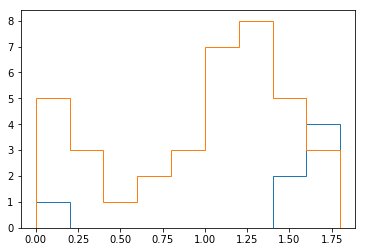

Vertebrata MannwhitneyuResult(statistic=111.0, pvalue=0.003610797975469851) 0.366796813227


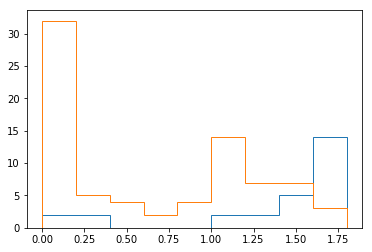

Euteleostomi MannwhitneyuResult(statistic=1069.0, pvalue=2.2731659656825792e-05) 0.346776022266


In [31]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt, numpy as np
cursor.execute('''SELECT MIN(dS), tax_group FROM paralogs WHERE ohnoT == "T" AND NOT dS IS NULL GROUP BY id''')
res1 = cursor.fetchall()
cursor.execute('''SELECT MIN(dS), tax_group FROM paralogs WHERE ohnoT IS NULL AND NOT dS IS NULL GROUP BY id''')
res2 = cursor.fetchall()
taxList = [x[1] for x in res2]
for t in set(taxList):
    if t == 'Vertebrata' or t == 'Euteleostomi':
        list1 = [x[0] for x in res1 if x[1] == t and x[0] < 2]
        list2 = [x[0] for x in res2 if x[1] == t and x[0] < 2]
        fig, ax = plt.subplots()
        ax.hist(list1, bins = np.arange(0,2,0.2), histtype='step')
        ax.hist(list2, bins = np.arange(0,2,0.2), histtype='step')
        plt.show()
        print(t, mannwhitneyu(list1,list2), mann_whitney_effect_size(list1,list2))
    

In [37]:
db.close()

In [60]:
# one more go at regression
import sklearn.linear_model as lm
model = lm.LogisticRegression(multi_class= 'multinomial', solver= 'lbfgs')

cursor.execute('''SELECT gLength, 
                        cds_len, 
                        ess, 
                        unique_domains, 
                        gc3, domains, 
                        specificity, 
                        trans_count, 
                        intron_count,
                        intron_length,
                        avg_intron,
                        max_exp,
                        motif_number_1k,
                        PPIs,
                        dup_type2
                    FROM gene_features WHERE dup_type2 == "WGD" OR dup_type2 == "SSD" OR dup_type2 == "singleton"''')
res = cursor.fetchall()
res = [x for x in res if x.count(None) == 0]
X = [x[:-1] for x in res]
Y = [x[-1] for x in res]

model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
model.coef_

array([[ -6.16611167e-05,   1.51757453e-05,   3.37322625e-07,
          1.46334971e-07,  -9.27768612e-08,   7.18735712e-07,
         -4.85229176e-08,  -7.64885658e-07,  -1.37254338e-06,
          6.25910213e-05,  -2.49113190e-05,   7.08994525e-05,
         -1.12424464e-06,  -1.26160463e-05],
       [  5.16824899e-05,  -1.78500483e-05,   3.89685515e-07,
          1.64233566e-07,   8.53687950e-09,   9.90772550e-08,
         -4.75750141e-08,  -6.61724739e-07,  -5.11661351e-07,
         -5.10960499e-05,   1.12129253e-05,  -1.05151729e-04,
         -1.07800235e-07,  -6.62662283e-06],
       [  9.97862674e-06,   2.67430300e-06,  -7.27008139e-07,
         -3.10568537e-07,   8.42399817e-08,  -8.17812967e-07,
          9.60979318e-08,   1.42661040e-06,   1.88420473e-06,
         -1.14949714e-05,   1.36983937e-05,   3.42522767e-05,
          1.23204487e-06,   1.92426691e-05]])

In [62]:
model.intercept_

array([ -1.19874499e-07,  -1.31860273e-07,   2.51734772e-07])

In [125]:
# restarting random forest estimate of feature importance
cursor.execute('''SELECT gLength, 
                   cds_len, 
                   ess, 
                   unique_domains, 
                   gc3, 
                   domains, 
                   specificity, 
                   trans_count, 
                   intron_count,
                   avg_intron,
                   max_exp, 
                   motif_number_1k, 
                   PPIs, 
                   dn_ds,
                   dup_type2
               FROM gene_features
                   INNER JOIN
                   macaque_paralogs
                       ON
                       macaque_paralogs.id == gene_features.id
               WHERE
                   (dup_type2 == "SSD"
                   OR
                   dup_type2 == "WGD"
                   OR
                   dup_type2 == "singleton")
                   AND
                   dn_ds < 10''')
res = [x for x in cursor.fetchall() if x.count(None) == 0]


In [126]:
import pandas as pd
from math import log10
res = [(log10(x[0]), log10(x[1]), x[2], x[3], x[4],x[5], x[6], x[7], x[8], log10(x[9]), log10(x[10]), x[11], x[12], x[13],x[14]) if x[9] != 0 else (log10(x[0]), log10(x[1]), x[2], x[3], x[4],x[5], x[6], x[7], x[8], x[9],log10(x[10]), x[11], x[12], x[13],x[14]) for x in res]
df = pd.DataFrame(res)
df.columns = ['gLength','cds_len','ess','unique_domains','gc3','domains', 
                'specificity','trans_count', 'intron_count','avg_intron',
                'max_exp','motif_number_1k', 'PPIs','dn_ds','dup_type']

# uses dup_type2
feature_list = [x for x in df if x != 'dup_type']

features = df[feature_list]
target = df['dup_type']


# gives unbalanced dataset
# train_x, test_x, train_y, test_y = train_test_split(features, target, train_size=0.7)
# test_x.reset_index()
# test_y.reset_index()


sampler = RandomUnderSampler()

new_X, new_Y  = sampler.fit_sample(features, target)
new_X, new_Y = pd.DataFrame(new_X, columns=[x for x in features]), pd.DataFrame(new_Y)

train_x, test_x, train_y, test_y = train_test_split(new_X, new_Y, train_size = 0.7)

train_y, test_y = train_y.values.ravel(), test_y.values.ravel()

rf = RandomForestClassifier()
rf.fit(train_x, train_y)

/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
accuracy_score(test_y, rf.predict(test_x))

0.56164383561643838

In [128]:
accuracy_score(train_y, rf.predict(train_x))

0.98825413774693005

Feature ranking:
1. feature 2 (0.111769)
2. feature 6 (0.107824)
3. feature 13 (0.094666)
4. feature 1 (0.088488)
5. feature 4 (0.085655)
6. feature 0 (0.079076)
7. feature 10 (0.077003)
8. feature 9 (0.073869)
9. feature 12 (0.068116)
10. feature 8 (0.061969)
11. feature 7 (0.041714)
12. feature 5 (0.037695)
13. feature 3 (0.037254)
14. feature 11 (0.034902)


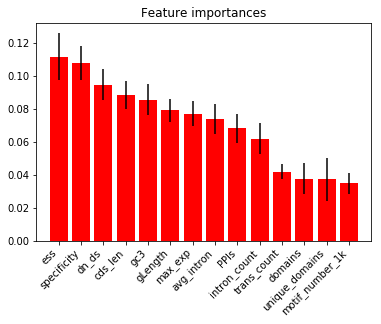

In [132]:
import numpy as np
import matplotlib.pyplot as plt
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices, rotation=45, ha='right')
ax.xaxis.set_ticklabels([x for x in features][i] for i in indices)

plt.xlim([-1, train_x.shape[1]])
plt.savefig('rf_feature_importance.png', bbox_inches='tight')
plt.show()

In [133]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = "tree.dot", feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('decision_tree.png')

/Users/zoevance/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: divide by zero encountered in log10


10


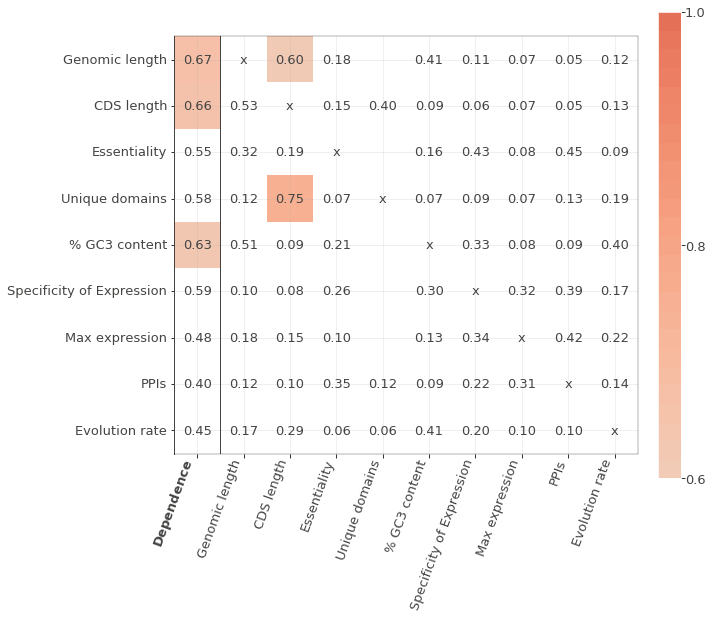

In [64]:
# entirely new ill-advised random forest attempt

from pandas import DataFrame
from numpy import log10
from numpy import inf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import rfpimp

cursor.execute('''SELECT 
                   gLength, 
                   cds_len,
                   ess,
                   unique_domains, 
                   domains,
                   gc_content, 
                   gc3,
                   motif_number_1k,
                   specificity,
                   trans_count, 
                   intron_count, 
                   avg_intron,
                   intron_coverage,
                   max_exp,
                   PPIs,
                   macaque_paralogs.dn_ds,
                   dup_type_T2
                FROM
                   gene_features
                   INNER JOIN
                   macaque_paralogs
                   ON
                   gene_features.id == macaque_paralogs.id
                WHERE
                   dup_type_T2 == "WGD" OR dup_type_T2 == "singleton" OR dup_type_T2 == "singleton-ish"''')
data = cursor.fetchall()
df = DataFrame(data).dropna()

df.columns = ['Genomic length','CDS length','Essentiality','Unique domains','Domains','% GC content','% GC3 content','Regulatory motifs','Specificity of Expression','Transcript isoforms count','Intron count','Average intron length','Intron coverage','Max expression','PPIs','Evolution rate','dupType']
df = df.replace(to_replace='singleton-ish',value='singleton')



df['Genomic length'] = log10(df['Genomic length'])
df['CDS length'] = log10(df['CDS length'])
df['Average intron length'] = log10(df['Average intron length'])
df['Max expression'] = log10(df['Max expression'])
df['Average intron length'] = df['Average intron length'].replace(to_replace=-(np.inf),value=0)

# remove negative importance variables
df = df.drop(['% GC content','Transcript isoforms count','Regulatory motifs','Average intron length','Domains','Intron coverage','Intron count'],axis=1)

print(len(df.columns))

mat = rfpimp.feature_dependence_matrix(df.iloc[:,0:9])
viz2 = rfpimp.plot_dependence_heatmap(mat,figsize=[10,10],value_fontsize=13,label_fontsize=13)
viz2.save('WGDvsSing_dep_plot_final_model.svg')


In [49]:
# make test and train sets, fit model
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

sampler = RandomUnderSampler()
train_x, test_x, train_y, test_y = train_test_split(df[df.columns[:9]], df[df.columns[9]], train_size = 0.8)

train_X, train_Y  = sampler.fit_sample(train_x, train_y)
train_y, test_y = train_y.values.ravel(), test_y.values.ravel()



# trainSet, testSet = train_test_split(df,test_size=0.2)
# X_train, y_train = trainSet[df.columns[:10]], trainSet[df.columns[10]]
# X_test, y_test = testSet[df.columns[:10]],testSet[df.columns[10]]

rf = RandomForestClassifier()
rf.fit(train_X,train_Y)

/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
pd.Series(train_Y).value_counts()

WGD          1990
singleton    1990
dtype: int64

In [92]:
# search space for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
# CV search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2,n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_Y)
rf_random.best_params_
best_estDict = dict(sorted(zip(train_X.columns, rf_random.best_estimator_.feature_importances_),key=lambda x: x[1]))


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] n_estimators=1600, bootstrap=False, max_depth=30, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV] n_estimators=1600, bootstrap=False, max_depth=30, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=False, max_depth=30, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  30.3s
[CV] n_estimators=1600, bootstrap=False, max_depth=30, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=False, max_depth=30, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  30.6s
[CV] n_estimators=1600, bootstrap=False, max_depth=30, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=False, max_depth=30, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  30.1s
[CV] n_estimators=1600, bootstrap=False, max_depth=30, min_samples_leaf=4, max_featur

[CV] n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.2s
[CV] n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.3s
[CV] n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.2s
[CV] n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.2s
[CV] n_estimators=200, boots

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.3min


[CV]  n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.2s
[CV] n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.7s
[CV] n_estimators=1400, bootstrap=True, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=200, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.7s
[CV] n_estimators=1400, bootstrap=True, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=True, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=  16.7s
[CV] n_estimators=1400, bootstrap=True, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1400,

[CV]  n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  25.7s
[CV] n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  22.0s
[CV] n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  22.0s
[CV] n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  23.5s
[CV] n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2

[CV] n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  22.5s
[CV] n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  23.5s
[CV] n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  24.0s
[CV] n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  22.7s
[CV] n_estim

[CV]  n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   3.5s
[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   3.3s
[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=4, max_features=sqrt, min_samples_split=10, total=  20.7s
[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=4, max_features=sqrt, min_samples_split=10, total=  20.6s
[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=2

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 24.2min


[CV]  n_estimators=1400, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  15.0s
[CV] n_estimators=1400, bootstrap=True, max_depth=80, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  15.0s
[CV] n_estimators=1400, bootstrap=True, max_depth=80, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=True, max_depth=80, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  14.9s
[CV] n_estimators=1400, bootstrap=True, max_depth=80, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=True, max_depth=80, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  14.8s
[CV] n_estimators=1400, bootstrap=True, max_depth=80, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1

[CV]  n_estimators=1200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  15.0s
[CV] n_estimators=1200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  14.8s
[CV] n_estimators=1200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  16.7s
[CV] n_estimators=1200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  16.8s
[CV] n_estimators=1200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1200, boo

[CV]  n_estimators=400, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=   5.0s
[CV] n_estimators=400, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=400, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=   5.0s
[CV] n_estimators=400, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=400, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=   5.1s
[CV] n_estimators=1400, bootstrap=False, max_depth=90, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=400, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=   5.0s
[CV] n_estimators=1400, bootstrap=False, max_depth=90, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400,

[CV] n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  21.7s
[CV] n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  21.7s
[CV] n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  26.0s
[CV] n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1400, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  26.6s
[CV] n_estimators=14

[CV] n_estimators=1200, bootstrap=True, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  15.0s
[CV] n_estimators=1200, bootstrap=True, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  15.0s
[CV] n_estimators=1200, bootstrap=True, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  17.4s
[CV] n_estimators=1200, bootstrap=True, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  17.3s
[CV] n_estimators=1200, boot

[CV] n_estimators=1200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  18.4s
[CV] n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  18.3s
[CV] n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=10 
[CV]  n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=10, total=  11.8s
[CV] n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=10 
[CV]  n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=10, total=  11.9s
[CV] n_estimators=80

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 51.4min


[CV]  n_estimators=1400, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=  27.1s
[CV] n_estimators=1400, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=  23.5s
[CV] n_estimators=1400, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=  23.5s
[CV] n_estimators=1400, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=  30.6s
[CV] n_estimators=1400, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]

[CV] n_estimators=600, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  12.2s
[CV] n_estimators=600, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  13.9s
[CV] n_estimators=600, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  13.5s
[CV] n_estimators=600, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=   9.4s
[CV] n_estimators=2000, boot

[CV] n_estimators=1800, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1000, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=  16.9s
[CV] n_estimators=1800, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1800, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  19.7s
[CV] n_estimators=1800, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1800, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  19.7s
[CV] n_estimators=1800, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1800, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  19.9s
[CV] n_estimators=1800, boo

[CV] n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=sqrt, min_samples_split=2, total=  20.2s
[CV] n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=sqrt, min_samples_split=2, total=  21.5s
[CV] n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=sqrt, min_samples_split=2, total=  21.2s
[CV] n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=sqrt, min_samples_split=2, total=  19.7s
[CV] n_estimators=1600, boot

[CV] n_estimators=600, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  10.0s
[CV] n_estimators=600, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=   9.8s
[CV] n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=600, bootstrap=False, max_depth=20, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  10.3s
[CV] n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  34.7s
[CV] n_estimators=2000

[CV]  n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  26.3s
[CV] n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  26.8s
[CV] n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  27.5s
[CV] n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  27.6s
[CV] n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1

[CV] n_estimators=1000, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  11.2s
[CV] n_estimators=1000, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  11.4s
[CV] n_estimators=1000, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  13.4s
[CV] n_estimators=1000, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  12.5s
[CV] n_estimators=1000, boot

[CV] n_estimators=2000, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  37.9s
[CV] n_estimators=1400, bootstrap=False, max_depth=100, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=2000, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  37.2s
[CV] n_estimators=1400, bootstrap=False, max_depth=100, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1400, bootstrap=False, max_depth=100, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  20.9s
[CV] n_estimators=1400, bootstrap=False, max_depth=100, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1400, bootstrap=False, max_depth=100, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  21.0s
[CV] n_estimato

[CV] n_estimators=1400, bootstrap=True, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=True, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=  13.1s
[CV] n_estimators=1400, bootstrap=True, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=True, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=  14.1s
[CV] n_estimators=1400, bootstrap=True, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=True, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=  13.6s
[CV] n_estimators=1400, bootstrap=True, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=True, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=  13.5s
[CV] n_estimators=1400, boot

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 96.7min


[CV]  n_estimators=1200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  19.5s
[CV] n_estimators=1200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  19.4s
[CV] n_estimators=1200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  19.4s
[CV] n_estimators=1200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  19.0s
[CV] n_estimators=1200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1

[CV] n_estimators=1400, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  21.5s
[CV] n_estimators=800, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1400, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  21.7s
[CV] n_estimators=800, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=800, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=sqrt, min_samples_split=5, total=  14.1s
[CV] n_estimators=800, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=800, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=sqrt, min_samples_split=5, total=  14.1s
[CV] n_estimators=800,

[CV] n_estimators=1600, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  18.3s
[CV] n_estimators=1600, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  18.1s
[CV] n_estimators=1600, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  21.1s
[CV] n_estimators=1600, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  21.0s
[CV] n_estimators=1600, boot

[CV] n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  18.4s
[CV] n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  18.1s
[CV] n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  17.8s
[CV] n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  17.9s
[CV] n_estimators=1000, boo

[CV]  n_estimators=1200, bootstrap=False, max_depth=80, min_samples_leaf=4, max_features=auto, min_samples_split=10, total=  19.4s
[CV] n_estimators=800, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  13.3s
[CV] n_estimators=800, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  13.4s
[CV] n_estimators=800, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  13.3s
[CV] n_estimators=800, bootstrap=False, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=

[CV]  n_estimators=1000, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  11.6s
[CV] n_estimators=1000, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1000, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  10.4s
[CV] n_estimators=1000, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1000, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  10.3s
[CV] n_estimators=1000, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1000, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  10.5s
[CV] n_estimators=1000, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1000, boo

[CV] n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  23.3s
[CV] n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  24.3s
[CV] n_estimators=1200, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  24.8s
[CV] n_estimators=1200, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  13.7s
[CV] n_estimators=1200,

[CV] n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=   3.6s
[CV] n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=   3.3s
[CV] n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=   3.3s
[CV] n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=   3.3s
[CV] n_estimators=200, boots

[CV] n_estimators=1600, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  21.2s
[CV] n_estimators=1600, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  20.5s
[CV] n_estimators=1600, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  20.4s
[CV] n_estimators=1600, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=False, max_depth=10, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  20.5s
[CV] n_estim

[CV]  n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=  21.7s
[CV] n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=  21.7s
[CV] n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  16.6s
[CV] n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  16.5s
[CV] n_estimators=1600, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1600, b

[CV]  n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  15.0s
[CV] n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  15.0s
[CV] n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  16.9s
[CV] n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  16.8s
[CV] n_estimators=1000, bootstrap=False, max_depth=40, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 144.5min finished


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [51]:
# take best rf from CV search
rfBestWGD = rf_random.best_estimator_
print(rfBestWGD)
sorted(zip(df.columns[:9], rf_random.best_estimator_.feature_importances_),key=lambda x: x[1])

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[('PPIs', 0.057898166129592206),
 ('% GC3 content', 0.07725754188435772),
 ('Unique domains', 0.08797201796427487),
 ('Max expression', 0.0881340671498249),
 ('Genomic length', 0.0884926189161334),
 ('CDS length', 0.12268172096297379),
 ('Specificity of Expression', 0.126037471082047),
 ('Essentiality', 0.16006103509660985),
 ('Evolution rate', 0.1914653608141862)]

In [53]:
# check accuracy improvement from hyperparameter training
print(accuracy_score(test_y,rf.predict(test_x)))
print(accuracy_score(test_y,rfBestWGD.predict(test_x)))

0.6189502385821404
0.6837082481254261


In [55]:
# check for bias towards either class
tn, fp, fn, tp = confusion_matrix(test_y, rfBestWGD.predict(test_x)).ravel()
print(tn,fp,fn,tp)
print('Singleton accuracy:',(tp/(tp+fn)))
print('WGD accuracy:',(tn/(tn+fp)))

372 132 332 631
Singleton accuracy: 0.6552440290758048
WGD accuracy: 0.7380952380952381


In [58]:
rankingDict = {}
for feature in df.columns[:9]:
    rankingDict[feature] = []
impDict = {}
for feature in df.columns[:9]:
    impDict[feature] = []
    
for i in range(10):
    sampler = RandomUnderSampler()
    train_x, test_x, train_y, test_y = train_test_split(df[df.columns[:9]], df[df.columns[9]], train_size = 0.8)
    train_X, train_Y  = sampler.fit_sample(train_x, train_y)

    rfBestSSD.fit(train_X,train_Y)
     
    imps = list(rfpimp.importances(rfBestSSD,test_x,test_y).itertuples(name=None))
    imps = sorted(imps,key= lambda x: x[1],reverse=True)
    for feature in df.columns[:9]:
        rank = [x[0] for x in imps].index(feature) + 1
        rankingDict[feature].append(rank)
        impDict[feature].append([x[1] for x in imps if x[0] == feature][0])
rankDict = {'Evolution rate':[],'Essentiality':[],'Specificity of Expression':[], 'Max expression':[],
           'CDS length':[],'PPIs':[],'Genomic length':[],'% GC3 content':[], 'Unique domains':[],
           '% GC content':[],'Transcript isoforms count':[],'Regulatory motifs':[],'Intron coverage':[],
           'Average intron length':[],'Intron count':[],'Domains':[]}
for f in rankingDict:
    rankDict[f].append(np.mean(rankingDict[f]))
    rankDict[f].append(np.std(rankingDict[f]))
print(rankDict)
print('')
for f in impDict:
    print(f, np.mean(impDict[f]))


/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_siz

{'Essentiality': [1.8, 0.6000000000000001], 'Evolution rate': [1.5, 0.6708203932499369], 'Max expression': [5.2, 1.661324772583615], 'Transcript isoforms count': [], 'Unique domains': [5.7, 1.2688577540449522], 'Regulatory motifs': [], 'Genomic length': [5.7, 2.0024984394500787], 'Specificity of Expression': [3.6, 1.8547236990991407], 'Intron coverage': [], 'Domains': [], 'Intron count': [], '% GC3 content': [6.2, 1.6], 'PPIs': [8.3, 1.0049875621120892], '% GC content': [], 'CDS length': [7.0, 1.4142135623730951], 'Average intron length': []}

Essentiality 0.03578732106339468
Evolution rate 0.042263122017723254
CDS length 0.01049761417859576
Max expression 0.015064758009543289
% GC3 content 0.012542603953646902
PPIs 0.005180640763462851
Genomic length 0.014587593728698023
Unique domains 0.014451261077027966
Specificity of Expression 0.024880708929788685


In [100]:
# run the random forest fit (using rfBest parameters) 10 times, get the 10 rankings for each features, get median?
rankingDict = {}
for feature in df.columns[:16]:
    rankingDict[feature] = []
impDict = {}
for feature in df.columns[:16]:
    impDict[feature] = []


rankingDict2 = {}
for feature in df.columns[:16]:
    rankingDict2[feature] = []
for i in range(10):
    sampler = RandomUnderSampler()
    train_x, test_x, train_y, test_y = train_test_split(df[df.columns[:16]],df[df.columns[16]], train_size = 0.8)

    train_X, train_Y  = sampler.fit_sample(train_x, train_y)
#     train_Y, test_y = train_Y.values.ravel(), test_y.values.ravel()

    rfBest.fit(train_X,train_Y)
     
    imps = list(rfpimp.importances(rfBest,test_x,test_y).itertuples(name=None))
    imps = sorted(imps,key= lambda x: x[1],reverse=True)
    for feature in df.columns[:16]:
        rank = [x[0] for x in imps].index(feature) + 1
        rankingDict[feature].append(rank)
        impDict[feature].append([x[1] for x in imps if x[0] == feature][0])
        
    imps = zip(df.columns[:16],rfBest.feature_importances_)
    imps = sorted(imps,key= lambda x: x[1],reverse=True)
    for feature in df.columns[:16]:
        rank = [x[0] for x in imps].index(feature) + 1
        rankingDict2[feature].append(rank)
for f in rankingDict:
    print(f, np.mean(rankingDict[f]))
print('')
for f in impDict:
    print(f, np.mean(impDict[f]))
# print('')
# for f in rankingDict2:
#     print(f, np.mean(rankingDict2[f]))

/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_siz

Specificity of Expression 2.9
Essentiality 2.3
Average intron length 12.2
Regulatory motifs 11.2
PPIs 8.2
Intron coverage 11.3
Max expression 5.1
Genomic length 8.5
Unique domains 9.2
Evolution rate 1.1
Intron count 13.3
Transcript isoforms count 11.1
Domains 13.3
% GC content 10.4
% GC3 content 8.9
CDS length 7.0

Specificity of Expression 2.9
Essentiality 2.3
Average intron length 12.2
Regulatory motifs 11.2
PPIs 8.2
Intron coverage 11.3
Max expression 5.1
Genomic length 8.5
Unique domains 9.2
Evolution rate 1.1
Intron count 13.3
Transcript isoforms count 11.1
Domains 13.3
% GC content 10.4
% GC3 content 8.9
CDS length 7.0


In [101]:
for f in rankingDict:
    print(f, np.mean(rankingDict[f]))
print('')
for f in impDict:
    print(f, np.mean(impDict[f]))

Specificity of Expression 2.9
Essentiality 2.3
Average intron length 12.2
Regulatory motifs 11.2
PPIs 8.2
Intron coverage 11.3
Max expression 5.1
Genomic length 8.5
Unique domains 9.2
Evolution rate 1.1
Intron count 13.3
Transcript isoforms count 11.1
Domains 13.3
% GC content 10.4
% GC3 content 8.9
CDS length 7.0

Specificity of Expression 0.022154055896387193
Essentiality 0.025085207907293773
Average intron length -0.002862985685071584
Regulatory motifs -0.001363326516700758
PPIs 0.0014996591683708483
Intron coverage -0.002113156100886171
Max expression 0.0096114519427403
Genomic length 0.0011588275391956394
Unique domains 0.0012951601908656961
Evolution rate 0.03749147920927063
Intron count -0.0033401499659168167
Transcript isoforms count -0.0005453306066803166
Domains -0.003885480572597133
% GC content -0.0010906612133605997
% GC3 content 0.0038173142467621047
CDS length 0.0046353101567825575


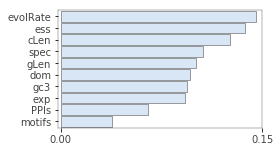

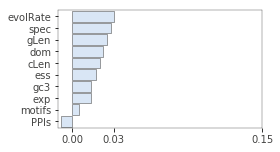

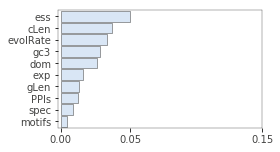

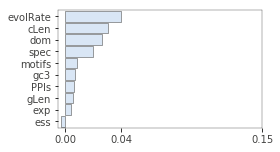

In [80]:
imps = []
for i,f in enumerate(df.columns[:10]):
    impList = []
    for tree in rf.estimators_:
        imp_this_tree = tree.feature_importances_[i]
        impList.append(imp_this_tree)
    imps.append(np.mean(impList))
imps = np.array(imps)
imp = DataFrame(data={'Feature':X_train.columns, 'Importance': imps})
imp = imp.set_index('Feature')
imp = imp.sort_values('Importance',ascending=False)

viz = rfpimp.plot_importances(imp)
viz.view()

imp = rfpimp.dropcol_importances(rf, X_train,y_train,X_test,y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

imp = rfpimp.importances(rf, X_test,y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

imp = rfpimp.oob_importances(rf, X_test,y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

/Users/zoevance/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: divide by zero encountered in log10


12


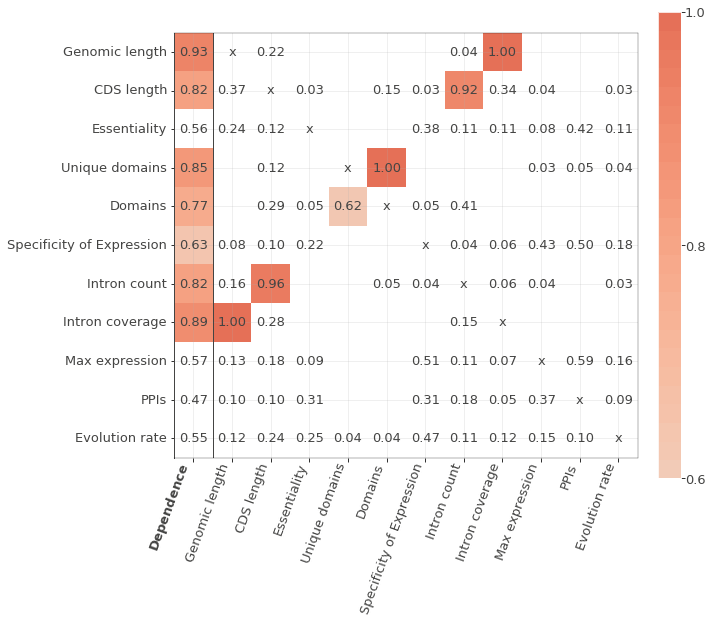

In [66]:
# entirely new ill-advised random forest attempt: SSD vs singleton

from pandas import DataFrame
from numpy import log10
from numpy import inf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import rfpimp

cursor.execute('''SELECT 
                   gLength, 
                   cds_len,
                   ess,
                   unique_domains, 
                   domains,
                   gc_content, 
                   gc3,
                   motif_number_1k,
                   specificity,
                   trans_count, 
                   intron_count, 
                   avg_intron,
                   intron_coverage,
                   max_exp,
                   PPIs,
                   macaque_paralogs.dn_ds,
                   dup_type_T2
                FROM
                   gene_features
                   INNER JOIN
                   macaque_paralogs
                   ON
                   gene_features.id == macaque_paralogs.id
                WHERE
                   dup_type_T2 == "SSD" OR dup_type_T2 == "singleton" OR dup_type_T2 == "singleton-ish"''')

data = cursor.fetchall()
df = DataFrame(data).dropna()
df.columns = ['Genomic length','CDS length','Essentiality','Unique domains','Domains','% GC content','% GC3 content','Regulatory motifs','Specificity of Expression','Transcript isoforms count','Intron count','Average intron length','Intron coverage','Max expression','PPIs','Evolution rate','dupType']
df = df.replace(to_replace='singleton-ish',value='singleton')



df['Genomic length'] = log10(df['Genomic length'])
df['CDS length'] = log10(df['CDS length'])
df['Average intron length'] = log10(df['Average intron length'])
df['Max expression'] = log10(df['Max expression'])
df['Average intron length'] = df['Average intron length'].replace(to_replace=-(np.inf),value=0)

# remove negative importance variables
df = df.drop(['% GC content','% GC3 content','Transcript isoforms count','Regulatory motifs','Average intron length'],axis=1)

print(len(df.columns))

# mat = rfpimp.feature_dependence_matrix(df.iloc[:,0:16])
# viz2 = rfpimp.plot_dependence_heatmap(mat,figsize=[10,10])
# viz2.save('SSDvsSing_dep_plot.svg')






mat = rfpimp.feature_dependence_matrix(df.iloc[:,0:11])
viz2 = rfpimp.plot_dependence_heatmap(mat,figsize=[10,10],label_fontsize=13,value_fontsize=13)
viz2.save('SSDvsSing_dep_plot_final_model.svg')

In [36]:
# make test and training set : SSD
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd



sampler = RandomUnderSampler()
train_x, test_x, train_y, test_y = train_test_split(df[df.columns[:11]], df[df.columns[11]], train_size = 0.8)

train_X, train_Y  = sampler.fit_sample(train_x, train_y)
# train_Y, test_y = train_Y.values.ravel(), test_y.values.ravel()


rf = RandomForestClassifier()
rf.fit(train_X,train_Y)

/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
rfBestSSD = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfBestSSD.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2,n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_Y)
rf_random.best_params_
# best_estDict = dict(sorted(zip(train_X.columns, rf_random.best_estimator_.feature_importances_),key=lambda x: x[1]))


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] n_estimators=1000, bootstrap=False, max_depth=100, min_samples_leaf=2, max_features=sqrt, min_samples_split=10 
[CV] n_estimators=1000, bootstrap=False, max_depth=100, min_samples_leaf=2, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1000, bootstrap=False, max_depth=100, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  16.0s
[CV] n_estimators=1000, bootstrap=False, max_depth=100, min_samples_leaf=2, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1000, bootstrap=False, max_depth=100, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  16.4s
[CV] n_estimators=1000, bootstrap=False, max_depth=100, min_samples_leaf=2, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1000, bootstrap=False, max_depth=100, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  17.3s
[CV] n_estimators=1000, bootstrap=False, max_depth=100, min_samples_lea

[CV]  n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   5.6s
[CV] n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   5.6s
[CV] n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   5.4s
[CV] n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   5.3s
[CV] n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=400, boot

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.1min


[CV]  n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   5.3s
[CV] n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   5.2s
[CV] n_estimators=400, bootstrap=True, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=400, bootstrap=False, max_depth=40, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   5.3s
[CV] n_estimators=400, bootstrap=True, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=400, bootstrap=True, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   3.6s
[CV] n_estimators=400, bootstrap=True, max_depth=110, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=400, 

[CV] n_estimators=1000, bootstrap=False, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1000, bootstrap=False, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  12.5s
[CV] n_estimators=1000, bootstrap=False, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1000, bootstrap=False, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  12.6s
[CV] n_estimators=1000, bootstrap=False, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1000, bootstrap=False, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  12.4s
[CV] n_estimators=1000, bootstrap=False, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1000, bootstrap=False, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  12.9s
[CV]

[CV]  n_estimators=1200, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  12.1s
[CV] n_estimators=1200, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1200, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  11.6s
[CV] n_estimators=1200, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1200, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  10.8s
[CV] n_estimators=1200, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1200, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  10.8s
[CV] n_estimators=1200, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1200, boo

[CV]  n_estimators=1000, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=5, total=   8.9s
[CV] n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1000, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=5, total=   9.0s
[CV] n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=4, max_features=sqrt, min_samples_split=10, total=  14.9s
[CV] n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=4, max_features=sqrt, min_samples_split=10, total=  14.6s
[CV] n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=180

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 16.6min


[CV]  n_estimators=1600, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  19.3s
[CV] n_estimators=1600, bootstrap=False, max_depth=60, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=10, total=  19.7s
[CV] n_estimators=1600, bootstrap=False, max_depth=60, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=False, max_depth=60, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  20.2s
[CV] n_estimators=1600, bootstrap=False, max_depth=60, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=False, max_depth=60, min_samples_leaf=2, max_features=auto, min_samples_split=10, total=  19.8s
[CV] n_estimators=1600, bootstrap=False, max_depth=60, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_esti

[CV] n_estimators=2000, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  26.5s
[CV] n_estimators=2000, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  26.6s
[CV] n_estimators=2000, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  24.8s
[CV] n_estimators=2000, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=False, max_depth=60, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  24.4s
[CV] n_estimators=20

[CV] n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  23.4s
[CV] n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  23.4s
[CV] n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  23.7s
[CV] n_estimators=1400, bootstrap=False, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=2000, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  23.9s
[CV] n_estimators=1400, boo

[CV] n_estimators=200, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   2.5s
[CV] n_estimators=200, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   2.6s
[CV] n_estimators=200, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.2s
[CV] n_estimators=200, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=auto, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=   3.4s
[CV] n_estimators=20

[CV] n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=5, total=  16.3s
[CV] n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=5, total=  16.2s
[CV] n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=5, total=  16.0s
[CV] n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=True, max_depth=70, min_samples_leaf=1, max_features=sqrt, min_samples_split=5, total=  15.9s
[CV] n_estimators=1800, boot

[CV] n_estimators=400, bootstrap=True, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=400, bootstrap=True, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=   7.5s
[CV] n_estimators=400, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=400, bootstrap=True, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=   6.9s
[CV] n_estimators=400, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=400, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   6.7s
[CV] n_estimators=400, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=400, bootstrap=True, max_depth=20, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=   6.6s
[CV] n_estimators=400, bootstrap=

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 40.1min


[CV]  n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  33.0s
[CV] n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  25.0s
[CV] n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  25.4s
[CV] n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=5, total=  30.3s
[CV] n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1

[CV]  n_estimators=200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=10, total=   3.2s
[CV] n_estimators=200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=10, total=   2.5s
[CV] n_estimators=200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=10, total=   2.6s
[CV] n_estimators=200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=200, bootstrap=False, max_depth=20, min_samples_leaf=4, max_features=sqrt, min_samples_split=10, total=   2.9s
[CV] n_estimators=1800, bootstrap=False, max_depth=90, min_samples_leaf=2, max_features=auto, min_samples_split=10 
[CV]  n_estimators=

[CV] n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=False, max_depth=60, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  15.4s
[CV] n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  24.6s
[CV] n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  24.6s
[CV] n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=True, max_depth=90, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=  27.2s
[CV] n_estimators=2000, boo

[CV] n_estimators=800, bootstrap=False, max_depth=None, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=800, bootstrap=False, max_depth=None, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  15.8s
[CV] n_estimators=800, bootstrap=False, max_depth=None, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=800, bootstrap=False, max_depth=None, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  16.6s
[CV] n_estimators=800, bootstrap=False, max_depth=None, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=800, bootstrap=False, max_depth=None, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  16.0s
[CV] n_estimators=800, bootstrap=False, max_depth=None, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=800, bootstrap=False, max_depth=None, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  17.2s
[CV] n_estim

[CV] n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=10, total=  13.0s
[CV] n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=10, total=  13.0s
[CV] n_estimators=200, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=True, max_depth=50, min_samples_leaf=4, max_features=auto, min_samples_split=10, total=  13.1s
[CV] n_estimators=200, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=200, bootstrap=True, max_depth=40, min_samples_leaf=4, max_features=sqrt, min_samples_split=2, total=   1.7s
[CV] n_estimators=200, boo

[CV] n_estimators=800, bootstrap=True, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=True, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=  10.4s
[CV] n_estimators=800, bootstrap=True, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=True, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=   8.0s
[CV] n_estimators=800, bootstrap=True, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=True, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=   7.8s
[CV] n_estimators=800, bootstrap=True, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=True, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=2, total=   7.3s
[CV] n_estimators=800, bootstrap=Tru

[CV] n_estimators=1800, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1800, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  17.9s
[CV] n_estimators=1800, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1800, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  18.1s
[CV] n_estimators=1800, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1800, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  17.9s
[CV] n_estimators=1800, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1800, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=2, total=  17.2s
[CV] n_estimators=600, boots

[CV] n_estimators=600, bootstrap=False, max_depth=None, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=5, total=  10.0s
[CV] n_estimators=600, bootstrap=False, max_depth=None, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=None, min_samples_leaf=4, max_features=sqrt, min_samples_split=2, total=   7.0s
[CV] n_estimators=600, bootstrap=False, max_depth=None, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=None, min_samples_leaf=4, max_features=sqrt, min_samples_split=2, total=   6.9s
[CV] n_estimators=600, bootstrap=False, max_depth=None, min_samples_leaf=4, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=600, bootstrap=False, max_depth=None, min_samples_leaf=4, max_features=sqrt, min_samples_split=2, total=   6.9s
[CV] n_estimat

[CV] n_estimators=1800, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  23.6s
[CV] n_estimators=1800, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  20.8s
[CV] n_estimators=1800, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  21.1s
[CV] n_estimators=1800, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=1800, bootstrap=False, max_depth=110, min_samples_leaf=4, max_features=sqrt, min_samples_split=5, total=  21.2s
[CV] n_estim

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 74.2min


[CV]  n_estimators=2000, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  23.5s
[CV] n_estimators=2000, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  23.2s
[CV] n_estimators=2000, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  23.9s
[CV] n_estimators=2000, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2000, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  24.0s
[CV] n_estimators=2000, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=2

[CV] n_estimators=1600, bootstrap=False, max_depth=90, min_samples_leaf=1, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1600, bootstrap=False, max_depth=90, min_samples_leaf=1, max_features=auto, min_samples_split=5, total=  20.7s
[CV] n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1600, bootstrap=False, max_depth=90, min_samples_leaf=1, max_features=auto, min_samples_split=5, total=  21.0s
[CV] n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=   2.6s
[CV] n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=200, bootstrap=False, max_depth=40, min_samples_leaf=2, max_features=sqrt, min_samples_split=2, total=   2.6s
[CV] n_estimators=200, bo

[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=10, total=  17.7s
[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=10, total=  17.6s
[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=10, total=  18.9s
[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=1, max_features=auto, min_samples_split=10, total=  18.7s
[CV] n_estimators=20

[CV]  n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  16.2s
[CV] n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  16.1s
[CV] n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  15.9s
[CV] n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=1400, bootstrap=False, max_depth=70, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=  16.4s
[CV] n_estimators=1400, bootstrap=True, max_depth=None, min_samples_leaf=4, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators

[CV] n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=600, bootstrap=True, max_depth=60, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=   6.8s
[CV] n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  34.8s
[CV] n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  33.5s
[CV] n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=2000, bootstrap=False, max_depth=30, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=  24.8s
[CV] n_estimators=2000

[CV]  n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=   9.2s
[CV] n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=   9.2s
[CV] n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=   9.7s
[CV] n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2, total=   9.6s
[CV] n_estimators=800, bootstrap=False, max_depth=90, min_samples_leaf=4, max_features=auto, min_samples_split=2 
[CV]  n_estimators=800, boot

[CV] n_estimators=200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   1.9s
[CV] n_estimators=200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   1.9s
[CV] n_estimators=200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   1.8s
[CV] n_estimators=2000, bootstrap=True, max_depth=60, min_samples_leaf=4, max_features=sqrt, min_samples_split=5 
[CV]  n_estimators=200, bootstrap=True, max_depth=30, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   1.9s
[CV] n_estimators=2000, boot

[CV] n_estimators=1000, bootstrap=True, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=True, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=   8.8s
[CV] n_estimators=1000, bootstrap=True, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=True, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=   8.6s
[CV] n_estimators=1000, bootstrap=True, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=True, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=   9.0s
[CV] n_estimators=1000, bootstrap=True, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=5 
[CV]  n_estimators=1000, bootstrap=True, max_depth=110, min_samples_leaf=2, max_features=auto, min_samples_split=5, total=   8.9s
[CV] n_estimators=10

[CV] n_estimators=1200, bootstrap=True, max_depth=None, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=None, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  11.3s
[CV] n_estimators=1200, bootstrap=True, max_depth=None, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=None, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  11.1s
[CV] n_estimators=1200, bootstrap=True, max_depth=None, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=None, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  10.9s
[CV] n_estimators=1200, bootstrap=True, max_depth=None, min_samples_leaf=1, max_features=sqrt, min_samples_split=2 
[CV]  n_estimators=1200, bootstrap=True, max_depth=None, min_samples_leaf=1, max_features=sqrt, min_samples_split=2, total=  10.8s
[CV] n_estim

[CV]  n_estimators=600, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=auto, min_samples_split=10, total=   8.3s
[CV] n_estimators=600, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=600, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=auto, min_samples_split=10, total=   7.5s
[CV] n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=600, bootstrap=False, max_depth=80, min_samples_leaf=1, max_features=auto, min_samples_split=10, total=   7.6s
[CV] n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=10, total=  18.9s
[CV] n_estimators=1400, bootstrap=False, max_depth=50, min_samples_leaf=1, max_features=auto, min_samples_split=10 
[CV]  n_estimato

[CV] n_estimators=600, bootstrap=False, max_depth=100, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=600, bootstrap=False, max_depth=100, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   7.4s
[CV] n_estimators=600, bootstrap=False, max_depth=100, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=600, bootstrap=False, max_depth=100, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   7.5s
[CV] n_estimators=600, bootstrap=False, max_depth=100, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=600, bootstrap=False, max_depth=100, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   7.5s
[CV] n_estimators=600, bootstrap=False, max_depth=100, min_samples_leaf=1, max_features=sqrt, min_samples_split=10 
[CV]  n_estimators=600, bootstrap=False, max_depth=100, min_samples_leaf=1, max_features=sqrt, min_samples_split=10, total=   9.2s
[CV] n_estim

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 113.9min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [43]:
rfBestSSD = rf_random.best_estimator_
print(rfBestSSD)
sorted(zip(df.columns[:11], rf_random.best_estimator_.feature_importances_),key=lambda x: x[1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[('Unique domains', 0.03440327137413846),
 ('Domains', 0.06997539807287022),
 ('Genomic length', 0.07447129931706532),
 ('Evolution rate', 0.07538267509091798),
 ('Intron count', 0.077486215081843),
 ('Max expression', 0.07811504379422636),
 ('Intron coverage', 0.07940839370655609),
 ('PPIs', 0.08878829111329885),
 ('CDS length', 0.09743380016644011),
 ('Essentiality', 0.13656881839468255),
 ('Specificity of Expression', 0.18796679388796098)]

In [40]:
tn, fp, fn, tp = confusion_matrix(test_y, rfBestSSD.predict(test_x)).ravel()

print('Overall accuracy:', accuracy_score(test_y,rfBestSSD.predict(test_x)))
print('Singleton accuracy:', tp/(tp+fn))
print('SSD accuracy:', tn/(tn+fp))

Overall accuracy: 0.6838288614938361
Singleton accuracy: 0.6942675159235668
SSD accuracy: 0.6613272311212814


In [41]:
# run the random forest fit (using rfBestSSD parameters) 10 times, get the 10 rankings for each features, get median?

from boruta import BorutaPy
rankingDict = {}
for feature in df.columns[:16]:
    rankingDict[feature] = []
impDict = {}
for feature in df.columns[:16]:
    impDict[feature] = []
    
rankingDict2 = {}
for feature in df.columns[:16]:
    rankingDict2[feature] = []
    
rankingDict3 = {}
for feature in df.columns[:16]:
    rankingDict3[feature] = []
for i in range(10):
    sampler = RandomUnderSampler()
    train_x, test_x, train_y, test_y = train_test_split(df[df.columns[:16]], df[df.columns[16]], train_size = 0.8)
    train_X, train_Y  = sampler.fit_sample(train_x, train_y)

    rfBestSSD.fit(train_X,train_Y)
     
    imps = list(rfpimp.importances(rfBestSSD,test_x,test_y).itertuples(name=None))
    imps = sorted(imps,key= lambda x: x[1],reverse=True)
    for feature in df.columns[:16]:
        rank = [x[0] for x in imps].index(feature) + 1
        rankingDict[feature].append(rank)
        impDict[feature].append([x[1] for x in imps if x[0] == feature][0])
        
    imps = zip(df.columns[:16],rfBestSSD.feature_importances_)
    imps = sorted(imps,key= lambda x: x[1],reverse=True)
    for feature in df.columns[:16]:
        rank = [x[0] for x in imps].index(feature) + 1
        rankingDict2[feature].append(rank)

    feat_selector = BorutaPy(rfBestSSD)
    feat_selector.fit(X_test.values,y_test.values)
    imps = zip(df.columns[:16],feat_selector.ranking_)
    imps = sorted(imps,key= lambda x: x[1],reverse=True)
    for feature in X_test.columns:
        rank = [x[0] for x in imps].index(feature) + 1
        rankingDict3[feature].append(rank)
        
rankTuple, rankTuple2, rankTuple3 = [],[],[]
for f in rankingDict:
    rankTuple.append((f, np.mean(rankingDict[f])))

# for f in rankingDict2:
#     rankTuple2.append((f, np.mean(rankingDict2[f])))
    
# for f in rankingDict3:
#     rankTuple3.append((f, np.mean(rankingDict3[f])))
                                
for f in rankingDict:
    print(f, np.mean(rankingDict[f]))
print('')
for f in impDict:
    print(f, np.mean(impDict[f]))
rankTuple = sorted(rankTuple, reverse=True, key=lambda x:x[1])
[print(x) for x in rankTuple]
print('')
                                
# rankTuple2 = sorted(rankTuple2, reverse=True, key=lambda x:x[1])
# [print(x) for x in rankTuple2]
# print('')
# rankTuple3 = sorted(rankTuple3, reverse=True, key=lambda x:x[1])
# [print(x) for x in rankTuple3]

IndexError: index 16 is out of bounds for axis 0 with size 12

In [45]:
rankingDict = {}
for feature in df.columns[:11]:
    rankingDict[feature] = []
impDict = {}
for feature in df.columns[:11]:
    impDict[feature] = []
    
for i in range(10):
    sampler = RandomUnderSampler()
    train_x, test_x, train_y, test_y = train_test_split(df[df.columns[:11]], df[df.columns[11]], train_size = 0.8)
    train_X, train_Y  = sampler.fit_sample(train_x, train_y)

    rfBestSSD.fit(train_X,train_Y)
     
    imps = list(rfpimp.importances(rfBestSSD,test_x,test_y).itertuples(name=None))
    imps = sorted(imps,key= lambda x: x[1],reverse=True)
    for feature in df.columns[:11]:
        rank = [x[0] for x in imps].index(feature) + 1
        rankingDict[feature].append(rank)
        impDict[feature].append([x[1] for x in imps if x[0] == feature][0])
rankDict = {'Evolution rate':[],'Essentiality':[],'Specificity of Expression':[], 'Max expression':[],
           'CDS length':[],'PPIs':[],'Genomic length':[],'% GC3 content':[], 'Unique domains':[],
           '% GC content':[],'Transcript isoforms count':[],'Regulatory motifs':[],'Intron coverage':[],
           'Average intron length':[],'Intron count':[],'Domains':[]}
for f in rankingDict:
    rankDict[f].append(np.mean(rankingDict[f]))
    rankDict[f].append(np.std(rankingDict[f]))
print(rankDict)
print('')
for f in impDict:
    print(f, np.mean(impDict[f]))


/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_siz

{'Essentiality': [8.8, 1.4000000000000001], 'Evolution rate': [9.9, 1.0440306508910548], 'Max expression': [7.7, 1.1874342087037917], 'Transcript isoforms count': [], 'Unique domains': [6.6, 2.0591260281974], 'Regulatory motifs': [], 'Genomic length': [8.2, 2.0396078054371136], 'Specificity of Expression': [1.0, 0.0], 'Intron coverage': [8.6, 1.6852299546352716], 'Domains': [2.8, 0.9797958971132713], 'Intron count': [4.0, 2.04939015319192], '% GC3 content': [], 'PPIs': [4.2, 1.8330302779823358], '% GC content': [], 'CDS length': [4.2, 1.4696938456699067], 'Average intron length': []}

Essentiality 0.005656272661348804
Domains 0.026250906453952137
Intron count 0.022842639593908632
CDS length 0.019941986947063096
Max expression 0.008266860043509794
Intron coverage 0.0068165337200870365
PPIs 0.01972443799854966
Genomic length 0.007106598984771584
Evolution rate 0.0033357505438723735
Unique domains 0.011965192168237871
Specificity of Expression 0.07411167512690356


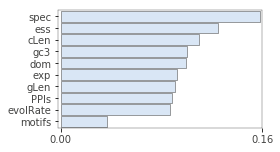

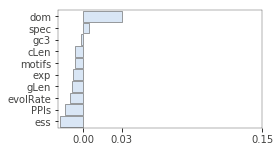

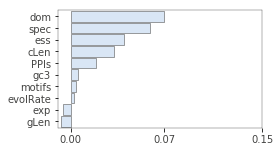

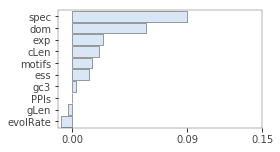

In [88]:
imps = []
# for i,f in enumerate(df.columns[:10]):
#     impList = []
#     for tree in rf.estimators_:
#         imp_this_tree = tree.feature_importances_[i]
#         impList.append(imp_this_tree)
#     imps.append(np.mean(impList))
# imps = np.array(imps)
# imp = DataFrame(data={'Feature':X_train.columns, 'Importance': imps})
# imp = imp.set_index('Feature')
# imp = imp.sort_values('Importance',ascending=False)

# viz = rfpimp.plot_importances(imp)
# viz.view()

# imp = rfpimp.dropcol_importances(rf, X_train,y_train,X_test,y_test)
# viz = rfpimp.plot_importances(imp)
# viz.view()

imp = rfpimp.importances(rf, X_test,y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

# imp = rfpimp.oob_importances(rf, X_test,y_test)
# viz = rfpimp.plot_importances(imp)
# viz.view()

/Users/zoevance/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in log10


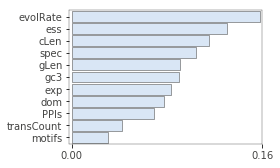

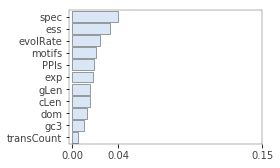

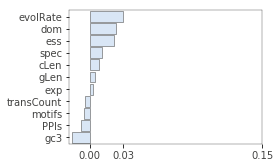

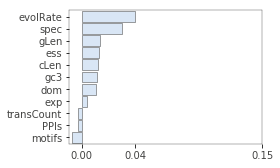

In [6]:
from pandas import DataFrame, concat
cursor.execute('''SELECT 
                   gLength, 
                   cds_len,
                   ess,
                   unique_domains, 
                   domains,
                   gc_content, 
                   gc3,
                   motif_number_1k,
                   specificity,
                   trans_count, 
                   intron_count, 
                   avg_intron,
                   intron_coverage,
                   max_exp,
                   PPIs,
                   macaque_paralogs.dn_ds,
                   dup_type_T2
                FROM
                   gene_features
                   INNER JOIN
                   macaque_paralogs
                   ON
                   gene_features.id == macaque_paralogs.id
                WHERE
                   dup_type_T2 == "WGD" OR dup_type_T2 == "singleton"''')
data = cursor.fetchall()
df = DataFrame(data).dropna()
df.columns = ['gLen','cLen','ess','uDom','dom','gc','gc3','motifs','spec','transCount','intCount','intAvg','intCov','exp','PPIs','evolRate','dupType']

df['gLen'] = log10(df['gLen'])
df['cLen'] = log10(df['cLen'])
df['intAvg'] = log10(df['intAvg'])
df['exp'] = log10(df['exp'])
df['intAvg'] = df.intAvg.replace(to_replace=-(np.inf),value=0)

features1 = df.iloc[:,0:3]
features1b = df.iloc[:,4:5]
features2 = df.iloc[:,6:10]
features2b = df.iloc[:,13:17]

features = concat([features1, features1b,features2,features2b],axis=1)

trainSet, testSet = train_test_split(features,test_size=0.2)
X_train, y_train = trainSet[features.columns[:11]], trainSet[features.columns[11]]
X_test, y_test = testSet[features.columns[:11]],testSet[features.columns[11]]

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

imps = []
for i,f in enumerate(features.columns[:11]):
    impList = []
    for tree in rf.estimators_:
        imp_this_tree = tree.feature_importances_[i]
        impList.append(imp_this_tree)
    imps.append(np.mean(impList))
imps = np.array(imps)
imp = DataFrame(data={'Feature':X_train.columns, 'Importance': imps})
imp = imp.set_index('Feature')
imp = imp.sort_values('Importance',ascending=False)

viz = rfpimp.plot_importances(imp)
viz.view()

imp = rfpimp.dropcol_importances(rf, X_train,y_train,X_test,y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

imp = rfpimp.importances(rf, X_test,y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

imp = rfpimp.oob_importances(rf, X_test,y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

In [8]:
from boruta import BorutaPy


feat_selector = BorutaPy(rf)
feat_selector.fit(X_test.values,y_test.values)
print(X_test.columns)
feat_selector.ranking_

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x10a4b9090>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators=1000, perc=100,
     random_state=<mtrand.RandomState object at 0x10a4b9090>,
     two_step=True, verbose=0)

In [9]:
print(X_test.columns)
feat_selector.ranking_

Index(['gLen', 'cLen', 'ess', 'dom', 'gc3', 'motifs', 'spec', 'transCount',
       'exp', 'PPIs', 'evolRate'],
      dtype='object')


array([1, 1, 1, 1, 1, 5, 1, 4, 2, 3, 1])

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [11]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_samples_leaf=1, max_depth=90, min_samples_split=5, n_estimators=1800, bootstrap=False, max_features=auto 
[CV] min_samples_leaf=1, max_depth=90, min_samples_split=5, n_estimators=1800, bootstrap=False, max_features=auto 
[CV]  min_samples_leaf=1, max_depth=90, min_samples_split=5, n_estimators=1800, bootstrap=False, max_features=auto, total=  21.2s
[CV]  min_samples_leaf=1, max_depth=90, min_samples_split=5, n_estimators=1800, bootstrap=False, max_features=auto, total=  21.3s
[CV] min_samples_leaf=1, max_depth=90, min_samples_split=5, n_estimators=1800, bootstrap=False, max_features=auto 
[CV] min_samples_leaf=4, max_depth=10, min_samples_split=5, n_estimators=800, bootstrap=True, max_features=sqrt 
[CV]  min_samples_leaf=4, max_depth=10, min_samples_split=5, n_estimators=800, bootstrap=True, max_features=sqrt, total=   5.8s
[CV] min_samples_leaf=4, max_depth=10, min_samples_split=5, n_estimators=800, bootstrap=Tru

[CV] min_samples_leaf=2, max_depth=70, min_samples_split=10, n_estimators=200, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=2, max_depth=70, min_samples_split=10, n_estimators=200, bootstrap=True, max_features=auto, total=   1.7s
[CV] min_samples_leaf=2, max_depth=70, min_samples_split=10, n_estimators=200, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=2, max_depth=70, min_samples_split=10, n_estimators=200, bootstrap=True, max_features=auto, total=   1.8s
[CV] min_samples_leaf=1, max_depth=30, min_samples_split=10, n_estimators=800, bootstrap=True, max_features=sqrt 
[CV]  min_samples_leaf=2, max_depth=70, min_samples_split=10, n_estimators=200, bootstrap=True, max_features=auto, total=   1.7s
[CV] min_samples_leaf=1, max_depth=30, min_samples_split=10, n_estimators=800, bootstrap=True, max_features=sqrt 
[CV]  min_samples_leaf=1, max_depth=30, min_samples_split=10, n_estimators=800, bootstrap=True, max_features=sqrt, total=   6.6s
[CV] min_samples_leaf=1, max

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min


[CV] min_samples_leaf=2, max_depth=10, min_samples_split=5, n_estimators=400, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=2, max_depth=10, min_samples_split=5, n_estimators=400, bootstrap=True, max_features=auto, total=   2.9s
[CV] min_samples_leaf=2, max_depth=10, min_samples_split=5, n_estimators=400, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=2, max_depth=10, min_samples_split=5, n_estimators=400, bootstrap=True, max_features=auto, total=   3.1s
[CV] min_samples_leaf=2, max_depth=10, min_samples_split=5, n_estimators=400, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=1, max_depth=30, min_samples_split=10, n_estimators=800, bootstrap=True, max_features=sqrt, total=   6.8s
[CV] min_samples_leaf=1, max_depth=100, min_samples_split=10, n_estimators=600, bootstrap=True, max_features=sqrt 
[CV]  min_samples_leaf=2, max_depth=10, min_samples_split=5, n_estimators=400, bootstrap=True, max_features=auto, total=   3.1s
[CV] min_samples_leaf=1, max_dept

[CV] min_samples_leaf=2, max_depth=90, min_samples_split=2, n_estimators=2000, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=2, max_depth=90, min_samples_split=2, n_estimators=2000, bootstrap=False, max_features=sqrt, total=  22.5s
[CV] min_samples_leaf=2, max_depth=90, min_samples_split=2, n_estimators=2000, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=2, max_depth=90, min_samples_split=2, n_estimators=2000, bootstrap=False, max_features=sqrt, total=  22.3s
[CV] min_samples_leaf=4, max_depth=70, min_samples_split=10, n_estimators=1400, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=4, max_depth=70, min_samples_split=10, n_estimators=1400, bootstrap=False, max_features=sqrt, total=  14.4s
[CV] min_samples_leaf=4, max_depth=70, min_samples_split=10, n_estimators=1400, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=2, max_depth=90, min_samples_split=2, n_estimators=2000, bootstrap=False, max_features=sqrt, total=  22.6s
[CV] min_samples_

[CV] min_samples_leaf=1, max_depth=80, min_samples_split=10, n_estimators=400, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=1, max_depth=80, min_samples_split=10, n_estimators=400, bootstrap=False, max_features=sqrt, total=   4.8s
[CV] min_samples_leaf=4, max_depth=80, min_samples_split=2, n_estimators=200, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=1, max_depth=80, min_samples_split=10, n_estimators=400, bootstrap=False, max_features=sqrt, total=   4.8s
[CV] min_samples_leaf=4, max_depth=80, min_samples_split=2, n_estimators=200, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=4, max_depth=80, min_samples_split=2, n_estimators=200, bootstrap=True, max_features=auto, total=   1.7s
[CV] min_samples_leaf=4, max_depth=80, min_samples_split=2, n_estimators=200, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=4, max_depth=80, min_samples_split=2, n_estimators=200, bootstrap=True, max_features=auto, total=   1.8s
[CV] min_samples_leaf=1, max_d

[CV] min_samples_leaf=2, max_depth=90, min_samples_split=10, n_estimators=1800, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=1, max_depth=80, min_samples_split=10, n_estimators=1000, bootstrap=False, max_features=auto, total=  11.3s
[CV] min_samples_leaf=2, max_depth=90, min_samples_split=10, n_estimators=1800, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=2, max_depth=90, min_samples_split=10, n_estimators=1800, bootstrap=True, max_features=auto, total=  14.1s
[CV] min_samples_leaf=2, max_depth=90, min_samples_split=10, n_estimators=1800, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=2, max_depth=90, min_samples_split=10, n_estimators=1800, bootstrap=True, max_features=auto, total=  14.2s
[CV] min_samples_leaf=1, max_depth=20, min_samples_split=5, n_estimators=800, bootstrap=False, max_features=auto 
[CV]  min_samples_leaf=2, max_depth=90, min_samples_split=10, n_estimators=1800, bootstrap=True, max_features=auto, total=  14.2s
[CV] min_samples_lea

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.4min


[CV]  min_samples_leaf=1, max_depth=40, min_samples_split=2, n_estimators=1200, bootstrap=False, max_features=auto, total=  14.7s
[CV] min_samples_leaf=1, max_depth=40, min_samples_split=2, n_estimators=1200, bootstrap=False, max_features=auto 
[CV]  min_samples_leaf=4, max_depth=40, min_samples_split=5, n_estimators=2000, bootstrap=False, max_features=sqrt, total=  22.6s
[CV] min_samples_leaf=1, max_depth=40, min_samples_split=2, n_estimators=1200, bootstrap=False, max_features=auto 
[CV]  min_samples_leaf=1, max_depth=40, min_samples_split=2, n_estimators=1200, bootstrap=False, max_features=auto, total=  14.6s
[CV] min_samples_leaf=1, max_depth=50, min_samples_split=5, n_estimators=800, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=1, max_depth=40, min_samples_split=2, n_estimators=1200, bootstrap=False, max_features=auto, total=  15.1s
[CV] min_samples_leaf=1, max_depth=50, min_samples_split=5, n_estimators=800, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf

[CV] min_samples_leaf=2, max_depth=90, min_samples_split=5, n_estimators=200, bootstrap=False, max_features=auto 
[CV]  min_samples_leaf=2, max_depth=90, min_samples_split=5, n_estimators=200, bootstrap=False, max_features=auto, total=   2.3s
[CV] min_samples_leaf=2, max_depth=90, min_samples_split=5, n_estimators=200, bootstrap=False, max_features=auto 
[CV]  min_samples_leaf=1, max_depth=None, min_samples_split=5, n_estimators=1600, bootstrap=True, max_features=sqrt, total=  13.7s
[CV] min_samples_leaf=4, max_depth=30, min_samples_split=2, n_estimators=400, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=2, max_depth=90, min_samples_split=5, n_estimators=200, bootstrap=False, max_features=auto, total=   2.5s
[CV] min_samples_leaf=4, max_depth=30, min_samples_split=2, n_estimators=400, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=4, max_depth=30, min_samples_split=2, n_estimators=400, bootstrap=False, max_features=sqrt, total=   4.3s
[CV] min_samples_leaf=4, m

[CV] min_samples_leaf=1, max_depth=80, min_samples_split=2, n_estimators=2000, bootstrap=True, max_features=sqrt 
[CV]  min_samples_leaf=1, max_depth=80, min_samples_split=2, n_estimators=2000, bootstrap=True, max_features=sqrt, total=  20.2s
[CV] min_samples_leaf=2, max_depth=50, min_samples_split=5, n_estimators=1200, bootstrap=True, max_features=sqrt 
[CV]  min_samples_leaf=2, max_depth=50, min_samples_split=5, n_estimators=1200, bootstrap=True, max_features=sqrt, total=  15.9s
[CV] min_samples_leaf=2, max_depth=50, min_samples_split=5, n_estimators=1200, bootstrap=True, max_features=sqrt 
[CV]  min_samples_leaf=1, max_depth=80, min_samples_split=2, n_estimators=2000, bootstrap=True, max_features=sqrt, total=  25.1s
[CV] min_samples_leaf=2, max_depth=50, min_samples_split=5, n_estimators=1200, bootstrap=True, max_features=sqrt 
[CV]  min_samples_leaf=2, max_depth=50, min_samples_split=5, n_estimators=1200, bootstrap=True, max_features=sqrt, total=  11.6s
[CV] min_samples_leaf=1, max

[CV] min_samples_leaf=4, max_depth=90, min_samples_split=5, n_estimators=800, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=4, max_depth=90, min_samples_split=10, n_estimators=400, bootstrap=True, max_features=auto, total=   3.2s
[CV] min_samples_leaf=4, max_depth=90, min_samples_split=5, n_estimators=800, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=4, max_depth=90, min_samples_split=5, n_estimators=800, bootstrap=True, max_features=auto, total=   6.2s
[CV] min_samples_leaf=4, max_depth=90, min_samples_split=5, n_estimators=800, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=4, max_depth=90, min_samples_split=5, n_estimators=800, bootstrap=True, max_features=auto, total=   6.2s
[CV] min_samples_leaf=4, max_depth=80, min_samples_split=5, n_estimators=2000, bootstrap=True, max_features=auto 
[CV]  min_samples_leaf=4, max_depth=90, min_samples_split=5, n_estimators=800, bootstrap=True, max_features=auto, total=   6.3s
[CV] min_samples_leaf=4, max_depth

[CV] min_samples_leaf=4, max_depth=70, min_samples_split=2, n_estimators=800, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=4, max_depth=None, min_samples_split=5, n_estimators=1800, bootstrap=False, max_features=auto, total=  19.1s
[CV] min_samples_leaf=4, max_depth=70, min_samples_split=2, n_estimators=800, bootstrap=False, max_features=sqrt 
[CV]  min_samples_leaf=4, max_depth=70, min_samples_split=2, n_estimators=800, bootstrap=False, max_features=sqrt, total=   8.8s
[CV] min_samples_leaf=1, max_depth=30, min_samples_split=2, n_estimators=2000, bootstrap=False, max_features=auto 
[CV]  min_samples_leaf=4, max_depth=70, min_samples_split=2, n_estimators=800, bootstrap=False, max_features=sqrt, total=   9.1s
[CV] min_samples_leaf=1, max_depth=30, min_samples_split=2, n_estimators=2000, bootstrap=False, max_features=auto 
[CV]  min_samples_leaf=1, max_depth=30, min_samples_split=2, n_estimators=2000, bootstrap=False, max_features=auto, total=  27.1s
[CV] min_samples_leaf=

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.8min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [13]:
rf_random.best_estimator_.feature_importances_

array([0.09720241, 0.12180806, 0.13601179, 0.12942727, 0.07427715,
       0.02053524, 0.09561432, 0.02606421, 0.06900326, 0.04545137,
       0.1846049 ])

In [105]:
from pandas import concat
# remove intron count
features1 = df.iloc[:,0:3]
features1b = df.iloc[:,4:5]
features2 = df.iloc[:,6:10]
features2b = df.iloc[:,13:16]

features = concat([features1, features1b,features2,features2b],axis=1)
# features = df[df.columns[:16]]
mat = rfpimp.feature_dependence_matrix(features)
viz2 = rfpimp.plot_dependence_heatmap(mat,figsize=[10,10])

In [92]:
features.describe()

,gLen,cLen,ess,uDom,dom,gc,gc3,motifs,spec,transCount,intCount,intAvg,intCov,exp,PPIs,evolRate
count,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000,5511.000000
mean,4.555684,3.153175,-0.657986,1.522591,1.922519,45.857935,0.580275,2.692070,0.768855,5.749047,13.900563,3.347260,0.846330,237.493561,45.432226,0.264524
std,0.582863,0.307907,0.861704,1.091207,2.395925,7.764099,0.164200,5.059545,0.159697,5.132508,11.015461,0.795306,0.180175,1803.817409,96.850344,0.285784
min,2.741939,2.193125,-5.533000,0.000000,0.000000,26.990000,0.222615,0.000000,0.321781,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.002440
25%,4.153769,2.945469,-0.910000,1.000000,1.000000,39.500000,0.436659,0.000000,0.641541,3.000000,7.000000,3.088675,0.814008,47.485000,5.000000,0.084760
50%,4.566650,3.155640,-0.360000,1.000000,1.000000,44.000000,0.580645,0.000000,0.771403,4.000000,11.000000,3.441754,0.909803,84.000000,20.000000,0.185520
75%,4.958268,3.356504,-0.095000,2.000000,2.000000,51.690000,0.720680,3.000000,0.917571,8.000000,18.000000,3.777399,0.955967,159.000000,52.000000,0.359560
max,6.393318,4.421505,0.457000,9.000000,52.000000,74.320000,0.971939,48.000000,0.999997,152.000000,157.000000,5.320940,0.998743,110955.000000,2862.000000,6.016950


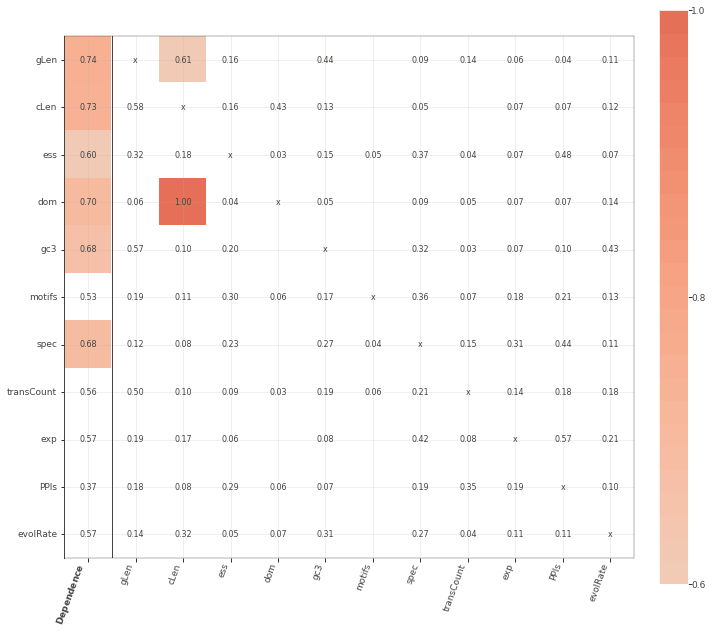

In [106]:
viz2.view()

In [ ]:
# removing u_dom and gc for definite (indexes 3 and 5)
# possibly all the intron nonsense (indexes 10 to 12)
4

In [124]:
#clustering??
#would need to reduce dimensionality of the data - PCA
from sklearn.decomposition import PCA
cursor.execute('''SELECT  
                   gLength,
                   cds_len,
                   ess,
                   unique_domains, 
                   domains,
                   gc_content, 
                   gc3,
                   motif_number_1k,
                   specificity,
                   trans_count, 
                   avg_intron,
                   intron_count, 
                   intron_coverage,
                   max_exp,
                   PPIs,
                   macaque_paralogs.dn_ds
                FROM
                   gene_features
                   INNER JOIN
                   macaque_paralogs
                   ON
                   gene_features.id == macaque_paralogs.id
                WHERE
                   dup_type_T2 == "singleton" OR dup_type_T2 == "singlton-ish"''')
data = cursor.fetchall()
df = DataFrame(data).dropna()

df.columns = ['gLen','cLen','ess','uDom','dom','gc','gc3','motifs','spec','transCount','avg_int','intCount','intCov','exp','PPIs','evolRate']
pca = PCA(n_components=2)
pca.fit(df)

p = pca.transform(df)

In [125]:
p = DataFrame(p)
DataFrame(pca.explained_variance_ratio_)

,0
0,0.996311
1,0.002833


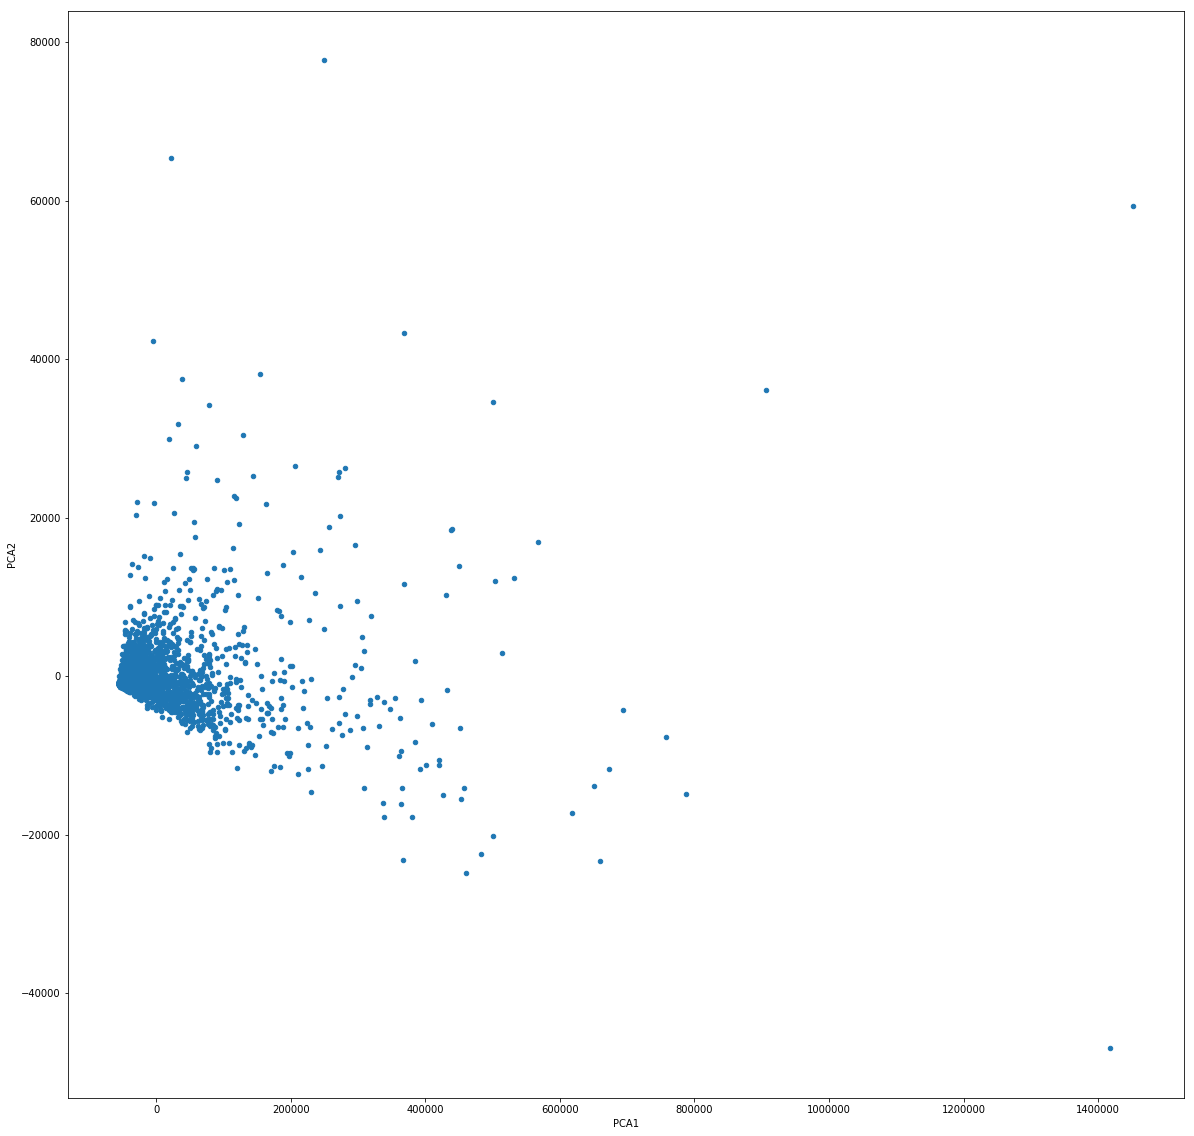

In [126]:
p.columns = ['PCA1','PCA2']
# p = p[p['PCA1'] < 600000]
p.plot(kind='scatter', x='PCA1',y='PCA2',figsize=(20,20))

In [127]:
from scipy.stats import spearmanr
for c in df.columns:
    print(c,spearmanr(df[c],p['PCA1']).correlation)

gLen 0.9999888367865848
cLen 0.47742570332932766
ess 0.08987071784501793
uDom 0.14676171818981756
dom 0.17257700566908396
gc -0.568790586016328
gc3 -0.4391013545311219
motifs -0.04944342586569263
spec -0.08871480305051707
transCount 0.26731154860727746
avg_int 0.8180704765028658
intCount 0.6365334795929272
intCov 0.8424545665297555
exp -0.1738644523745861
PPIs 0.11671788325005801
evolRate -0.06975855161012326


In [128]:
from scipy.stats import spearmanr
for c in df.columns:
    print(c,spearmanr(df[c],p['PCA2']).correlation)

gLen -0.07793149982476566
cLen -0.5669056550853798
ess 0.23610111116823465
uDom -0.18726079539918838
dom -0.20323140931244954
gc -0.062310767067663905
gc3 0.027578039500785127
motifs -0.06314717900936781
spec 0.12590683182706666
transCount -0.287295480602089
avg_int 0.41619034768763363
intCount -0.6260237315144384
intCov 0.13974453329821132
exp -0.014093956180008678
PPIs -0.21484178791853797
evolRate 0.15844770323638901


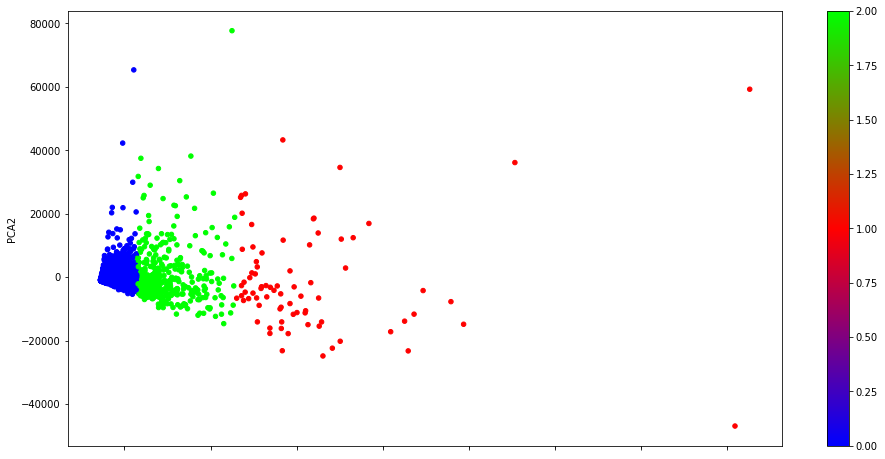

In [187]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,n_init=20)
clusters = km.fit(p)
p['cluster'] = pd.Series(clusters.labels_, index=p.index)
p.plot(
    kind='scatter',
    x='PCA1',y='PCA2',
    c=p.cluster.astype(np.float), 
    figsize=(16,8),colormap='brg')

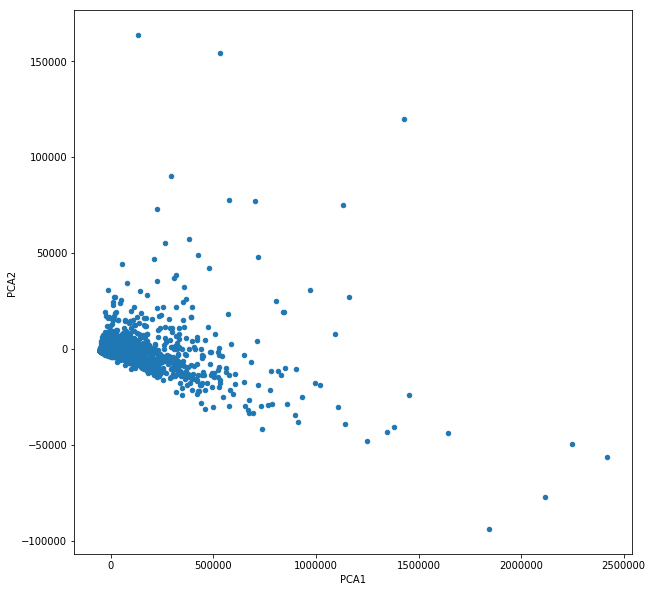

In [156]:
cursor.execute('''SELECT  
                   gLength,
                   cds_len,
                   ess,
                   unique_domains, 
                   domains,
                   gc_content, 
                   gc3,
                   motif_number_1k,
                   specificity,
                   trans_count, 
                   avg_intron,
                   intron_count, 
                   intron_coverage,
                   max_exp,
                   PPIs,
                   macaque_paralogs.dn_ds
                FROM
                   gene_features
                   INNER JOIN
                   macaque_paralogs
                   ON
                   gene_features.id == macaque_paralogs.id
                WHERE
                   dup_type_T2 == "WGD"''')
data2 = cursor.fetchall()
df2 = DataFrame(data2).dropna()

df2.columns = ['gLen','cLen','ess','uDom','dom','gc','gc3','motifs','spec','transCount','avg_int','intCount','intCov','exp','PPIs','evolRate']
pW = DataFrame(pca.transform(df2))
pW.columns = ['PCA1','PCA2']
pW['dupType'] = 1
pW.plot(kind='scatter',x='PCA1',y='PCA2',figsize=(10,10))


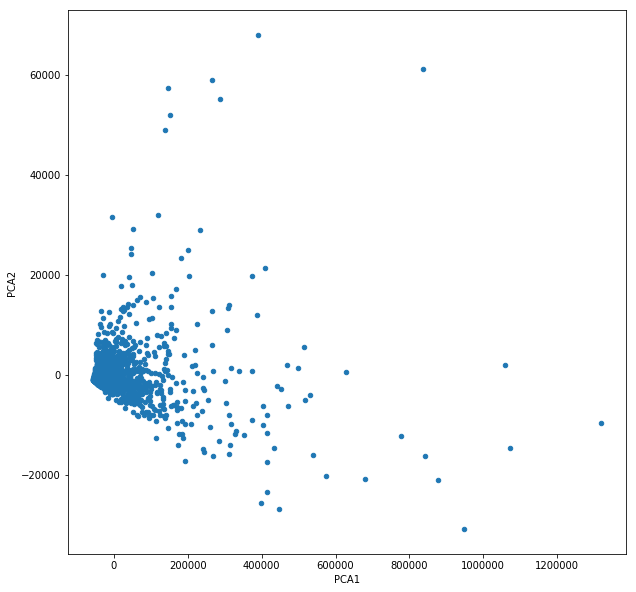

In [157]:
cursor.execute('''SELECT  
                   gLength,
                   cds_len,
                   ess,
                   unique_domains, 
                   domains,
                   gc_content, 
                   gc3,
                   motif_number_1k,
                   specificity,
                   trans_count, 
                   avg_intron,
                   intron_count, 
                   intron_coverage,
                   max_exp,
                   PPIs,
                   macaque_paralogs.dn_ds
                FROM
                   gene_features
                   INNER JOIN
                   macaque_paralogs
                   ON
                   gene_features.id == macaque_paralogs.id
                WHERE
                   dup_type_T2 == "SSD"''')
data3 = cursor.fetchall()
df3 = DataFrame(data3).dropna()

df3.columns = ['gLen','cLen','ess','uDom','dom','gc','gc3','motifs','spec','transCount','avg_int','intCount','intCov','exp','PPIs','evolRate']
pS = DataFrame(pca.transform(df3))
pS.columns = ['PCA1','PCA2']
pS['dupType'] = 2
pS.plot(kind='scatter',x='PCA1',y='PCA2',figsize=(10,10))

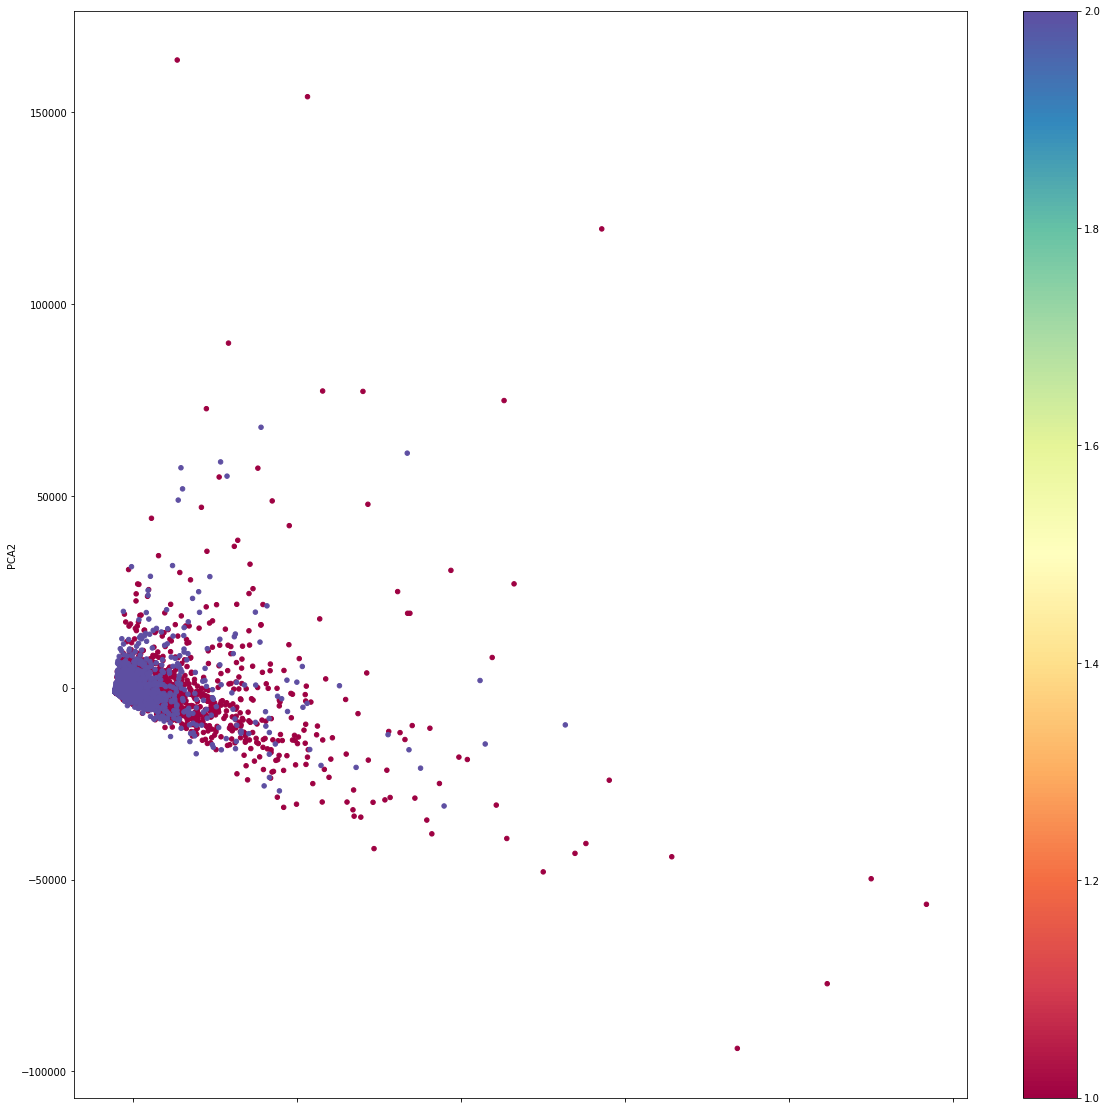

In [162]:
pB = pd.concat([pW,pS])
pB.plot(kind='scatter',x='PCA1',y='PCA2',c=pB.dupType,colormap='Spectral',figsize=(20,20))